# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





## **Loading the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the csv file of the data set and store it in a dataframe
path = "/content/drive/MyDrive/Almabetter Project and Assignment /Module 5/Superstore Marketing Data - Sheet1.csv"
dataset = pd.read_csv(path)

# Check out head of the dataset
dataset.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Create a new column as Total Spends
dataset['Total Spends'] = dataset['MntWines'] + dataset['MntFruits'] + dataset['MntMeatProducts'] + dataset['MntFishProducts'] + dataset['MntSweetProducts'] + dataset['MntGoldProds']

In [ ]:
# Dropping the 'Id' column as it is not needed in the aggregate analysis
dataset.drop('Id', axis=1, inplace=True)

In [ ]:
# Check the info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

Loaded the Data, Created a column `Total Spends` and droped the `ID` column cause it is not needed for our analysis

##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

The `Dt_Customer` column in the dataset contains numerous values formatted as `######`, indicating that these entries may be improperly formatted or placeholders and may need to be handled as missing data.

### **Data Cleaning**

In [ ]:
# Checking for duplicates rows
num_of_duplicate_rows = dataset.duplicated().sum()

print(f"Number of duplicate rows: {num_of_duplicate_rows}")

Number of duplicate rows: 182


In [ ]:
import re
def replace_with_nan(data):
  # Check if the string starts with "##" and is followed by any character
  if re.match(r'^##.', data):
    # If the condition is met, return np.nan
    return np.nan
  else:
    # If the condition is not met, return the original data
    return data

# Apply the function to the 'Dt_Customer' column in the dataset
dataset['Dt_Customer'] = dataset['Dt_Customer'].apply(replace_with_nan)

In [ ]:
# Count the number of missing values in the 'Dt_Customer' column
null_values = dataset.isnull().sum()
print(f'Count of Null Values:\n {null_values}')

Count of Null Values:
 Year_Birth               0
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer            916
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
Response                 0
Complain                 0
Total Spends             0
dtype: int64


There are 916 null values in the `Dt_Customer` column, which represents approximately 40.9% of the total 2,240 rows. Additionally, there are 24 null values in the `Income` column, accounting for about 1.1% of the total 2,240 rows.

Note: We replaced the ##### with null values to simplify data handling.

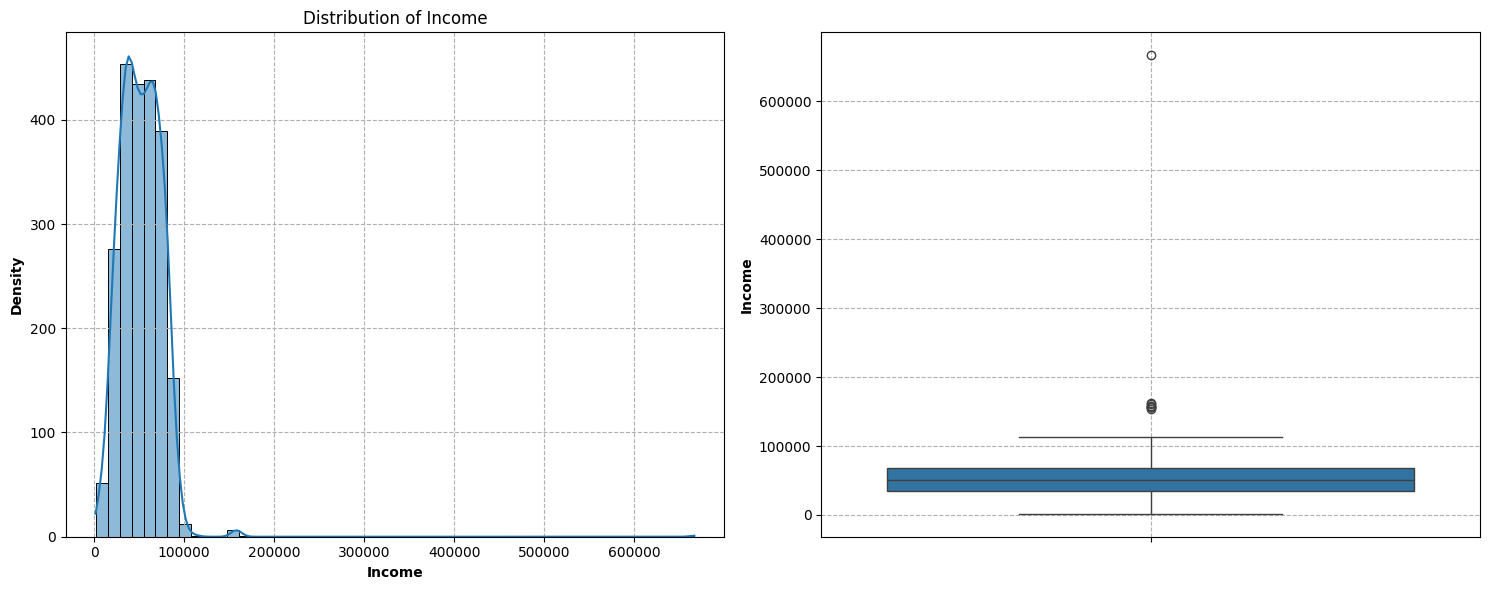

In [ ]:
# Checking the distribution for the Income Column
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(dataset['Income'], bins=50, kde=True)
plt.xlabel("Income", fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.grid(True, linestyle='--')
plt.title("Distribution of Income")

plt.subplot(1,2,2)
sns.boxplot(y=dataset['Income'])
plt.ylabel("Income", fontweight='bold')
plt.grid(True, linestyle='--')

plt.tight_layout()
plt.show()

In the case of a right-skewed (positively skewed) distribution, imputing missing values with the median is generally advisable. The median is less influenced by the skewness and outliers in the data compared to the mean, providing a more robust measure of central tendency.

In [ ]:
# median of Income
median_income = dataset['Income'].median()
mean_income = dataset['Income'].mean()
print(f'Median of the Income Column: {median_income}')
print(f'Mean of the Income Column: {mean_income}')

Median of the Income Column: 51381.5
Mean of the Income Column: 52247.25135379061


In [ ]:
# Filling the missing value in Income Column with Median
dataset['Income'].fillna(dataset['Income'].median(), inplace=True)

In [ ]:
# Lets convert the Dt_Customer to a datetime formate
dataset["Dt_Customer"] = dataset["Dt_Customer"].astype("datetime64[s]")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype        
---  ------               --------------  -----        
 0   Year_Birth           2240 non-null   int64        
 1   Education            2240 non-null   object       
 2   Marital_Status       2240 non-null   object       
 3   Income               2240 non-null   float64      
 4   Kidhome              2240 non-null   int64        
 5   Teenhome             2240 non-null   int64        
 6   Dt_Customer          1324 non-null   datetime64[s]
 7   Recency              2240 non-null   int64        
 8   MntWines             2240 non-null   int64        
 9   MntFruits            2240 non-null   int64        
 10  MntMeatProducts      2240 non-null   int64        
 11  MntFishProducts      2240 non-null   int64        
 12  MntSweetProducts     2240 non-null   int64        
 13  MntGoldProds         2240 non-null   int64      

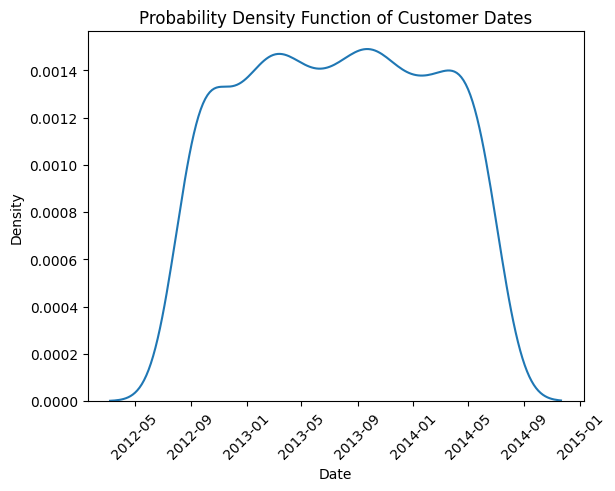

In [ ]:
#Lets check the distribution of the Dt_Customer
# Plotting the PDF of Dt_Customer
sns.kdeplot(dataset["Dt_Customer"])  # Adjust bandwidth with bw_adjust for smoother results
plt.xlabel('Date')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.title('Probability Density Function of Customer Dates')
plt.show()

**Since the distribution is roughly uniform, using the mean to fill the null values is appropriate because it accurately represents the central tendency of the data.**

In [ ]:
# Fill the missing value with the mean
dataset["Dt_Customer"].fillna(dataset["Dt_Customer"].mean(), inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype        
---  ------               --------------  -----        
 0   Year_Birth           2240 non-null   int64        
 1   Education            2240 non-null   object       
 2   Marital_Status       2240 non-null   object       
 3   Income               2240 non-null   float64      
 4   Kidhome              2240 non-null   int64        
 5   Teenhome             2240 non-null   int64        
 6   Dt_Customer          2240 non-null   datetime64[s]
 7   Recency              2240 non-null   int64        
 8   MntWines             2240 non-null   int64        
 9   MntFruits            2240 non-null   int64        
 10  MntMeatProducts      2240 non-null   int64        
 11  MntFishProducts      2240 non-null   int64        
 12  MntSweetProducts     2240 non-null   int64        
 13  MntGoldProds         2240 non-null   int64      

**Data Cleaning and Handling Missing Values Report**

**Introduction:** This report outlines the process of cleaning and handling missing values for the 'Dt_Customer' column, which records customer enrollment dates but contained invalid entries like "######".

**Steps Taken:**

Identifying and Replacing Erroneous Values:
A custom function identified and replaced invalid "######" entries with np.nan.

**Checking for Missing Values:**
After replacing invalid entries, 916 null values were found, accounting for 40.9% of the total 2240 rows.

**Converting Data Type:**
The 'Dt_Customer' column was converted from string format (e.g., "5/13/2014") to datetime format for easier manipulation and analysis.

**Checking the Distribution:**
The distribution of 'Dt_Customer' dates was examined and found to be roughly uniform, indicating even spread over time.

**Filling Missing Values:**
Missing values were filled with the mean date, as it represented the central tendency in a uniform distribution, minimizing skewness.

**Conclusion**
The steps taken—replacing invalid entries, converting data types, analyzing distribution, and filling missing values—ensured the 'Dt_Customer' column's integrity and usability, preparing the dataset for further analysis and modeling. Thorough data cleaning is crucial for maintaining data quality and accuracy in data-driven projects.

### **Analyze the distribution of customer demographics**

#### Marital Status

In [ ]:
# Get unique marital status categories from the dataset
marital_category = dataset["Marital_Status"].unique()

# Print the unique marital status categories
print(f'Marital Categories: {marital_category}')

Marital Categories: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


**Since Alone and Single means the same thing Lets Replace Alone with Single and Together and Married as Couple**

In [ ]:
# Replacing Alone with Single
dataset['Marital_Status'] = dataset['Marital_Status'].replace({'Alone': 'Single', 'Married': 'Couple', 'Together':'Couple'})

Since some value were overlapping the Pie Chart, I have shuffled the data set and set seed for reproducibility

In [ ]:
np.random.seed(42) # Set a seed for reproducibility
# Randomly shuffle the counts of 'Marital_Status' values
marital_status_counts = dataset['Marital_Status'].value_counts().sample(frac=1).reset_index()

marital_status_counts['Proportion'] = np.round(marital_status_counts['count'] / marital_status_counts['count'].sum()*100, 2)

marital_status_counts

,Marital_Status,count,Proportion
0,Couple,1444,64.46
1,Single,483,21.56
2,Absurd,2,0.09
3,Divorced,232,10.36
4,YOLO,2,0.09
5,Widow,77,3.44


In [ ]:
# Mode of Marital_Status
mode_marital_status = dataset['Marital_Status'].mode()[0]

print(f'Mode of Marital Status: {mode_marital_status}')

Mode of Marital Status: Couple


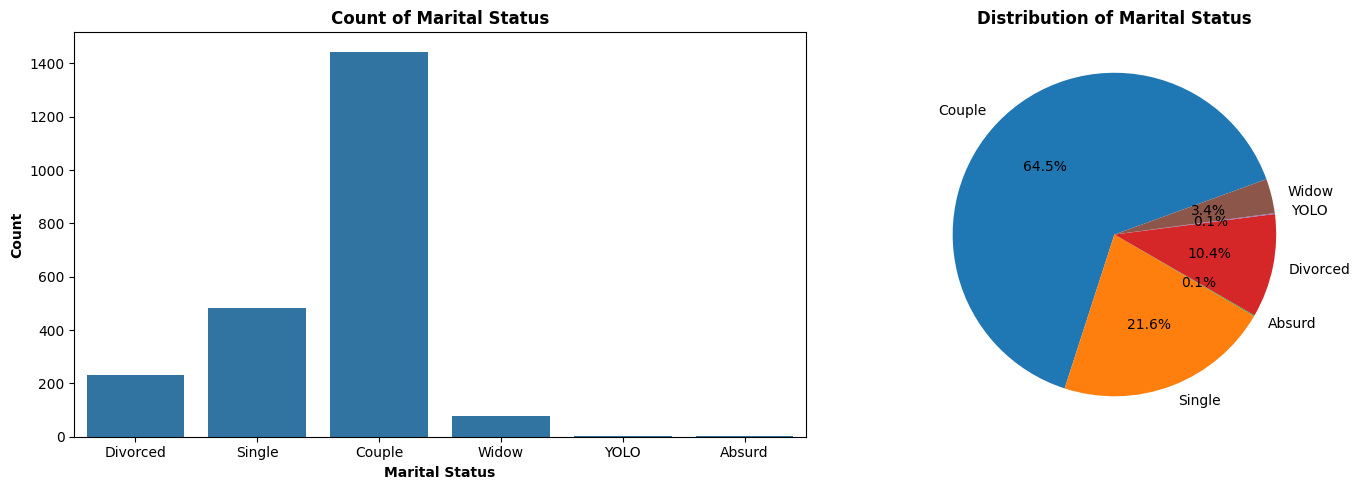

In [ ]:
# Lets Plot a Bar chart and a Pie chart to have a look at the distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

# Bar Chart
sns.countplot(data=dataset, x='Marital_Status')
plt.title('Count of Marital Status', fontweight='bold')
plt.xlabel('Marital Status', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.subplot(1,2,2)

# Pie Chart
plt.pie(marital_status_counts['count'], labels=marital_status_counts['Marital_Status'], autopct='%1.1f%%', startangle=20)
plt.title('Distribution of Marital Status', fontweight='bold')
# Show plots
plt.tight_layout()
plt.show()

The analysis of the Marital_Status column reveals that the majority of customers are Couple. Specifically, 64.5% of the instances in this column are classified as "Couple". The remaining statuses include "Single" (21.6%), and "Divorced" (10.4%). This indicates that a significant portion of the customer base is composed of Couple individuals, which may influence customer behavior and preferences.

#### Age

In [ ]:
# Calculate age based on the year of birth and the current year (2024)
dataset['Age'] = 2024 - dataset['Year_Birth']

In [ ]:
dataset.Age.head()

,Age
0,54
1,63
2,66
3,57
4,35


In [ ]:
# Calculate the descriptive statistics of Age
age_mean = np.round(dataset['Age'].mean(), 2)
age_median = dataset['Age'].median()
age_mode = dataset["Age"].mode()[0]
age_std = np.round(dataset["Age"].std(), 2)
age_var = np.round(dataset['Age'].var(), 2)
age_25 = dataset['Age'].quantile(0.25)
age_75 = dataset['Age'].quantile(0.75)
age_range = dataset['Age'].max() - dataset['Age'].min()
age_iqr = age_75 - age_25
age_max = dataset['Age'].max()
age_min = dataset['Age'].min()
age_out_upperbound = age_75+(1.5*age_iqr)
age_out_lowerbound = age_25-(1.5*age_iqr)

age_stats = {"Mean":age_mean, "Median":age_median,
             "Mode":age_mode, "Standard Deviation": age_std,
             "Variance": age_var, "First Quartile": age_25,
             "Third Quartile": age_75, "Range": age_range,
             "IQR": age_iqr, "Outlier Lower-Bound": age_out_lowerbound,
             "Outlier Upper-Bound": age_out_upperbound}

# Create a DataFrame
stats_df = pd.DataFrame(age_stats, index=["Age"])

stats_df

,Mean,Median,Mode,Standard Deviation,Variance,First Quartile,Third Quartile,Range,IQR,Outlier Lower-Bound,Outlier Upper-Bound
Age,55.19,54.0,48,11.98,143.62,47.0,65.0,103,18.0,20.0,92.0


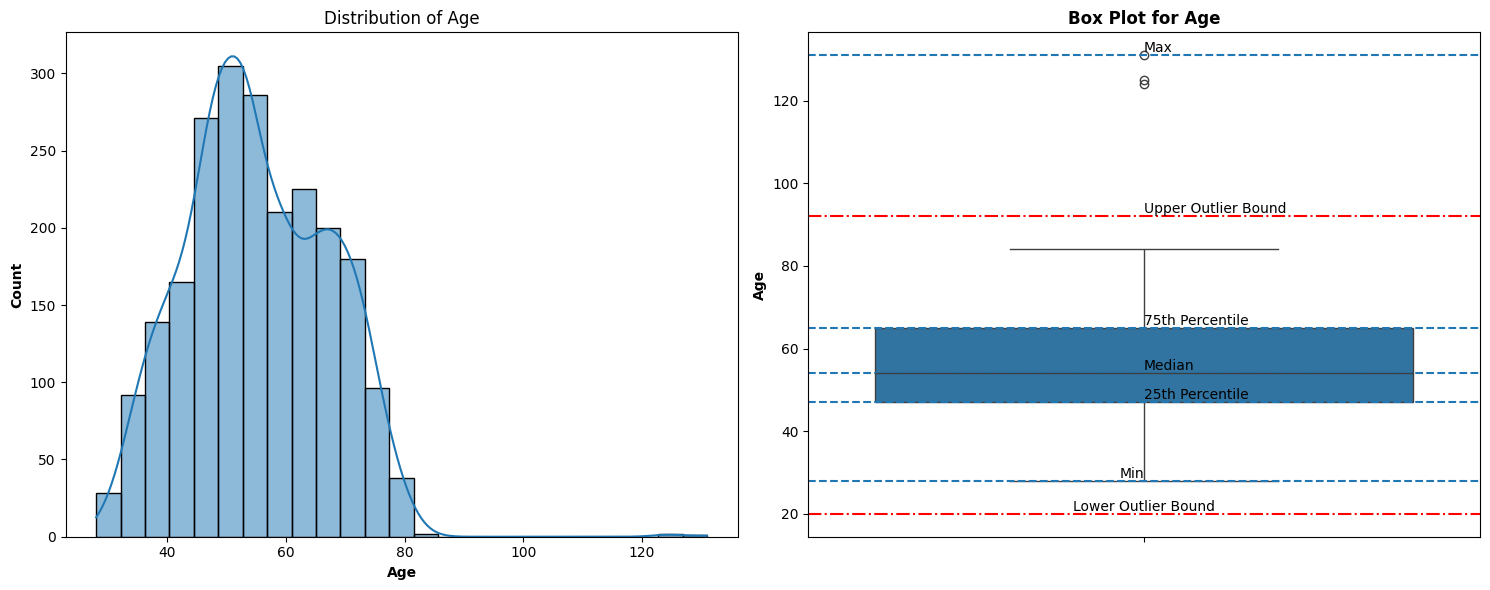

In [ ]:
# Plot the Distribution of the Age Column
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(dataset['Age'], bins=25, kde=True)
plt.xlabel("Age", fontweight="bold")
plt.ylabel('Count', fontweight='bold')
plt.title('Distribution of Age')

plt.subplot(1,2,2)
sns.boxplot(y=dataset['Age'])
plt.ylabel('Age', fontweight='bold')
plt.axhline(y=age_median, linestyle='--')
plt.axhline(y=age_25, linestyle='--')
plt.axhline(y=age_75, linestyle='--')
plt.axhline(y=age_max, linestyle='--')
plt.axhline(y=age_min, linestyle='--')

plt.axhline(y= age_out_upperbound, linestyle='-.', color='red')
plt.axhline(y=age_out_lowerbound, linestyle='-.', color='red')

# Adding labels to each horizontal line
plt.text(0, age_median, 'Median', va='bottom', ha='left')
plt.text(0, age_25, '25th Percentile',  va='bottom', ha='left')
plt.text(0, age_75, '75th Percentile',  va='bottom', ha='left')
plt.text(0, age_max, 'Max',  va='bottom', ha='left')
plt.text(0, age_min, 'Min',  va='bottom', ha='right')
plt.text(0, age_out_upperbound, 'Upper Outlier Bound',  va='bottom', ha='left')
plt.text(0, age_out_lowerbound, 'Lower Outlier Bound', va='bottom', ha='center')

plt.title('Box Plot for Age', fontweight='bold')

plt.tight_layout()
plt.show()



The age distribution has a mean of 55.19 and a median of 54.0, indicating a nearly normal distribution. The mean and median are close, suggesting symmetry. The mode is 48, which is lower than the mean and median. The standard deviation is 11.98, and the range is 103, reflecting moderate variability. Outliers are present but have minimal impact, as the histogram shows a nearly normal distribution.

#### Education

In [ ]:
# Retrieve unique values from the 'Education' column
education_categories = dataset['Education'].unique()

# Print the unique education categories
print(f'Education Categories: {education_categories}')

Education Categories: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [ ]:
mode_education = dataset['Education'].mode()[0]

print(f'Mode of Education: {mode_education}')

Mode of Education: Graduation


In [ ]:
# Calculate the proportion of each education category and add it as a new column
education_count = dataset['Education'].value_counts().reset_index()

# Calculate the proportion of each education category and add it as a new column
education_count['Proportion'] = np.round(education_count['count'] / education_count['count'].sum()*100, 2)

education_count

,Education,count,Proportion
0,Graduation,1127,50.31
1,PhD,486,21.70
2,Master,370,16.52
3,2n Cycle,203,9.06
4,Basic,54,2.41


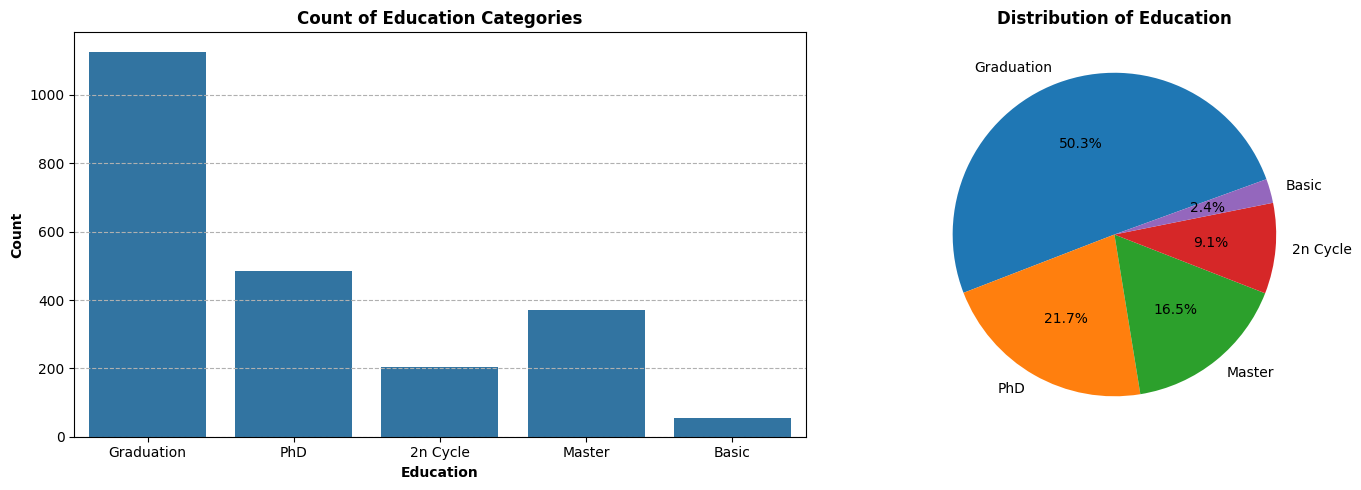

In [ ]:
# Lets Plot a Bar chart and a Pie chart to have a look at the distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

# Bar Chart
sns.countplot(data=dataset, x='Education')
plt.title('Count of Education Categories', fontweight='bold')
plt.xlabel('Education', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.grid(axis='y', linestyle='--')
plt.subplot(1,2,2)

# Pie Chart
plt.pie(education_count['count'], labels=education_count['Education'], autopct='%1.1f%%', startangle=20)
plt.title('Distribution of Education', fontweight='bold')
# Show plots
plt.tight_layout()
plt.show()

The majority of individuals in the dataset have completed Graduation, accounting for 50.31% of the total. PhD holders make up 21.70%, followed by Master’s degree holders at 16.52%. Those with a 2nd Cycle education represent 9.06%, and individuals with Basic education constitute the smallest group at 2.41%. The mode is Graduation, indicating it is the most common level of education.

### **Sumamry of Basic Statistics**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype        
---  ------               --------------  -----        
 0   Year_Birth           2240 non-null   int64        
 1   Education            2240 non-null   object       
 2   Marital_Status       2240 non-null   object       
 3   Income               2240 non-null   float64      
 4   Kidhome              2240 non-null   int64        
 5   Teenhome             2240 non-null   int64        
 6   Dt_Customer          2240 non-null   datetime64[s]
 7   Recency              2240 non-null   int64        
 8   MntWines             2240 non-null   int64        
 9   MntFruits            2240 non-null   int64        
 10  MntMeatProducts      2240 non-null   int64        
 11  MntFishProducts      2240 non-null   int64        
 12  MntSweetProducts     2240 non-null   int64        
 13  MntGoldProds         2240 non-null   int64      

In [ ]:
# Separate continuous, discrete, and categorical columns from a dataset
Categorical_columns = [column for column in dataset.columns if dataset[column].dtype == 'object']
Numerical_columns = [column for column in dataset.columns if dataset[column].dtype != 'object']
Continuous_columns = [column for column in Numerical_columns if len(dataset[column].unique()) > 20]
Discrete_columns = [column for column in Numerical_columns if len(dataset[column].unique()) < 20]


print("Categorical Columns:", Categorical_columns)
print("Continuous Columns:", Continuous_columns)
print("Discrete Columns:", Discrete_columns)

Categorical Columns: ['Education', 'Marital_Status']
Continuous Columns: ['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total Spends', 'Age']
Discrete Columns: ['Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain']


In [ ]:
# Create a custom func that takes column as an input and give the basic summary stats
def summary_stats(columns : list, data : pd.DataFrame) -> pd.DataFrame:
  '''
    This function takes a list of column names and a DataFrame as inputs, and returns basic
    statistics for each specified column. Statistics include:
    - Mode
    - Mean
    - Median
    - Standard Deviation
    - Variance
    - First Quartile (Q1)
    - Third Quartile (Q3)
    - Interquartile Range (IQR)
    - Range
    - Outlier Upper Bound
    - Outlier Lower Bound

    Parameters:
    columns (list): List of column names to calculate statistics for.
    data (pd.DataFrame): DataFrame containing the data.

    Returns:
    pd.DataFrame: DataFrame containing the calculated statistics.
    '''
  # Calculate the stats
  stats = {}
  for column in columns:
    if pd.api.types.is_numeric_dtype(data[column]):
      try:
        mean = np.round(data[column].mean(), 2)
      except:
        mean = np.nan
      try:
        std = np.round(data[column].std(), 2)
      except:
        std = np.nan
      try:
        var = np.round(data[column].var(), 2)
      except:
        var = np.nan
    else:
      try:
        mean = data[column].mean()
      except:
        mean = np.nan
      try:
        std = data[column].std()
      except:
        std = np.nan
      try:
        var = data[column].var()
      except:
        var = np.nan

    try:
      q25 = data[column].quantile(0.25)
    except:
      q25 = np.nan
    try:
      median = data[column].median()
    except:
      median = np.nan
    try:
      mode = data[column].mode()[0]
    except:
      mode = np.nan
    try:
      q75 = data[column].quantile(0.75)
    except:
      q75 = np.nan
    try:
      max_val = data[column].max()
    except:
      max_val = np.nan
    try:
      min_val = data[column].min()
    except:
      min_val = np.nan
    try:
      iqr = q75 - q25
    except:
      iqr = np.nan
    try:
      out_upperbound = q75 + 1.5 * iqr
    except:
      out_upperbound = np.nan
    try:
      out_lowerbound = q25 - 1.5 * iqr
    except:
      out_lowerbound = np.nan
    try:
      range_val = max_val - min_val
    except:
      range_val = np.nan

      # Create a Dict
    stats_dict = {'Mean': mean, 'Median': median,
                  'Std': std, 'Variance':var,
                    "First Quartile":q25, "Third Quartile":q75,
                    "IQR":iqr, "Range":range_val,
                    "Outlier Upper-Bound":out_upperbound,
                    "Outlier Lower-Bound":out_lowerbound}
    stats[column] = stats_dict



  # Create a DataFrame
  stats_df = pd.DataFrame(stats)

  return stats_df.T

In [ ]:
# Generating and presenting the summary statistics for all continuous columns in the DataFrame
summary_stats(Continuous_columns, dataset)

,Mean,Median,Std,Variance,First Quartile,Third Quartile,IQR,Range,Outlier Upper-Bound,Outlier Lower-Bound
Year_Birth,1968.81,1970.0,11.98,143.62,1959.0,1977.0,18.0,103.0,2004.0,1932.0
Income,52237.98,51381.5,25037.96,626899235.18,35538.75,68289.75,32751.0,664936.0,117416.25,-13587.75
Dt_Customer,2013-07-19 09:00:32,2013-07-19 09:00:32,155 days 10:46:06,NaN,2013-05-24 18:00:00,2013-09-16 00:00:00,114 days 06:00:00,699 days 00:00:00,2014-03-06 09:00:00,2012-12-04 09:00:00
Recency,49.11,49.0,28.96,838.82,24.0,74.0,50.0,99.0,149.0,-51.0
MntWines,303.94,173.5,336.6,113297.8,23.75,504.25,480.5,1493.0,1225.0,-697.0
MntFruits,26.3,8.0,39.77,1581.93,1.0,33.0,32.0,199.0,81.0,-47.0
MntMeatProducts,166.95,67.0,225.72,50947.43,16.0,232.0,216.0,1725.0,556.0,-308.0
MntFishProducts,37.53,12.0,54.63,2984.33,3.0,50.0,47.0,259.0,120.5,-67.5
MntSweetProducts,27.06,8.0,41.28,1704.08,1.0,33.0,32.0,263.0,81.0,-47.0
MntGoldProds,44.02,24.0,52.17,2721.44,9.0,56.0,47.0,362.0,126.5,-61.5


**Summary of Continuous Variables:**

**Year of Birth:**
Mean: 1968.81
Median: 1970.0
Std: 11.98
Range: 103.0
IQR: 18.0
Outlier Boundaries: 1932.0 (Lower), 2004.0 (Upper)

**Income:**
Mean: 52237.98
Median: 51381.5
Std: 25037.96
Range: 664936.0
IQR: 32751.0
Outlier Boundaries: -13587.75 (Lower), 117416.25 (Upper)

**Dt_Customer (Date of Customer Enrollment):**
Mean: 2013-07-19
Median: 2013-07-19
Std: 155 days
Range: 699 days
IQR: 114 days
Outlier Boundaries: 2012-12-04 (Lower), 2014-03-06 (Upper)

**Recency (Number of days since last purchase):**
Mean: 49.11
Median: 49.0
Std: 28.96
Range: 99.0
IQR: 50.0
Outlier Boundaries: -51.0 (Lower), 149.0 (Upper)

**MntWines (Amount spent on wines):**
Mean: 303.94
Median: 173.5
Std: 336.6
Range: 1493.0
IQR: 480.5
Outlier Boundaries: -697.0 (Lower), 1225.0 (Upper)

**MntFruits (Amount spent on fruits):**
Mean: 26.3
Median: 8.0
Std: 39.77
Range: 199.0
IQR: 32.0
Outlier Boundaries: -47.0 (Lower), 81.0 (Upper)

**MntMeatProducts (Amount spent on meat products):**
Mean: 166.95
Median: 67.0
Std: 225.72
Range: 1725.0
IQR: 216.0
Outlier Boundaries: -308.0 (Lower), 556.0 (Upper)

**MntFishProducts (Amount spent on fish products):**
Mean: 37.53
Median: 12.0
Std: 54.63
Range: 259.0
IQR: 47.0
Outlier Boundaries: -67.5 (Lower), 120.5 (Upper)

**MntSweetProducts (Amount spent on sweet products):**
Mean: 27.06
Median: 8.0
Std: 41.28
Range: 263.0
IQR: 32.0
Outlier Boundaries: -47.0 (Lower), 81.0 (Upper)

**MntGoldProds (Amount spent on gold products):**
Mean: 44.02
Median: 24.0
Std: 52.17
Range: 362.0
IQR: 47.0
Outlier Boundaries: -61.5 (Lower), 126.5 (Upper)

**Age:**
Mean: 55.19
Median: 54.0
Std: 11.98
Range: 103.0
IQR: 18.0
Outlier Boundaries: 20.0 (Lower), 92.0 (Upper)

**Observations:**
Income and MntWines have wide ranges and high standard deviations, indicating significant variability.
Recency and Age display moderate variability, as reflected by their standard deviations and ranges.
For Dt_Customer, the enrollment dates are fairly consistent, with a median around mid-2013 and an interquartile range of about 114 days.
Several metrics show negative lower outlier bounds, which is not realistic for spending and recency data. This indicates potential issues in the dataset that need to be addressed or validated.



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


### **Descriptive Statistics**

I chose the variables **MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, and NumWebVisitsMonth** as key variables because they comprehensively capture spending patterns, purchase channels, and customer engagement, providing a holistic view of purchasing behavior and preferences.

In [ ]:
# List of key variables capturing spending patterns, purchase channels, and customer engagement
key_variables = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Income',
    'Age'
]

print(f'Key variables are: {key_variables}')

Key variables are: ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Income', 'Age']


In [ ]:
# Create a custom function to calculate central tendency and measures of dispersion for columns.

def central_tendency_dispersion(columns : list, data : pd.DataFrame) -> pd.DataFrame:
    '''
    This function takes a list of column names and a DataFrame as inputs, and returns Central Tendency,
    Measure of Dispersion for each specified column. Statistics include:
    - Mode
    - Mean
    - Median
    - Standard Deviation
    - Variance
    - Range
    - Outlier Upper Bound
    - Outlier Lower Bound

    Parameters:
    columns (list): List of column names to calculate statistics for.
    data (pd.DataFrame): DataFrame containing the data.

    Returns:
    pd.DataFrame: DataFrame containing the calculated statistics.
    '''

    stats = {}
    for column in columns:
      mode = data[column].mode()[0]
      if pd.api.types.is_numeric_dtype(data[column]):
        try:
          mean = np.round(data[column].mean(), 2)
        except:
          mean = np.nan
        try:
          median = data[column].median()
        except:
          median = np.nan
        try:
          std = np.round(data[column].std(), 2)
        except:
          std = np.nan
        try:
          var = np.round(data[column].var(), 2)
        except:
          np.nan
      else:
        try:
          mean = data[column].mean()
        except:
          mean = np.nan
        try:
          std = data[column].std()
        except:
          std = np.nan
        try:
          var = data[column].var()
        except:
          var = np.nan
      try:
        skew = data[column].skew()
      except:
        skew = np.nan

      try:
        out_up_bound = mean + (3*std)
      except:
        out_up_bound = np.nan
      try:
        out_low_bound = mean - (3*std)
      except:
        out_low_bound = np.nan

      try:
        count_outlier = data[(data[column] > out_up_bound) | (data[column] < out_low_bound)].shape[0]
      except:
        count_outlier = np.nan
      try:
        per_outlier = np.round(((count_outlier / data.shape[0]) * 100), 2)
      except:
        per_outlier = np.nan

      stats_dict = {
                  'Mean':mean, 'Median':median,
                  'Mode':mode,
                  "Std": std, 'Variance':var,
                  "Skewness":skew,
                  "Outlier Upper Bound": out_up_bound,
                  'Outlier Lower Bound': out_low_bound,
                  'Number of Outlier': count_outlier,
                  'Percent of Outlier': per_outlier
                    }


      stats[column] = stats_dict

    stats_df = pd.DataFrame(stats)

    return stats_df.T

In [ ]:
# Central Tendency and Measure of Dispersion of Key Variables into dataframe
stats_df = central_tendency_dispersion(key_variables, data=dataset)
stats_df

,Mean,Median,Mode,Std,Variance,Skewness,Outlier Upper Bound,Outlier Lower Bound,Number of Outlier,Percent of Outlier
MntWines,303.94,173.5,2.0,336.60,1.132978e+05,1.175771,1313.74,-705.86,16.0,0.71
MntFruits,26.30,8.0,0.0,39.77,1.581930e+03,2.102063,145.61,-93.01,64.0,2.86
MntMeatProducts,166.95,67.0,7.0,225.72,5.094743e+04,2.083233,844.11,-510.21,37.0,1.65
MntFishProducts,37.53,12.0,0.0,54.63,2.984330e+03,1.919769,201.42,-126.36,58.0,2.59
MntSweetProducts,27.06,8.0,0.0,41.28,1.704080e+03,2.136081,150.90,-96.78,62.0,2.77
MntGoldProds,44.02,24.0,1.0,52.17,2.721440e+03,1.886106,200.53,-112.49,44.0,1.96
NumDealsPurchases,2.33,2.0,1.0,1.93,3.730000e+00,2.418569,8.12,-3.46,32.0,1.43
NumWebPurchases,4.08,4.0,2.0,2.78,7.720000e+00,1.382794,12.42,-4.26,4.0,0.18
NumCatalogPurchases,2.66,2.0,0.0,2.92,8.540000e+00,1.880989,11.42,-6.10,4.0,0.18
NumStorePurchases,5.79,5.0,3.0,3.25,1.057000e+01,0.702237,15.54,-3.96,0.0,0.00


#### **These descriptive statistics offer valuable insights into the central tendencies, variations, and potential outliers for each variable in the dataset. Here's a brief analysis:**

**Central Tendencies:**

Mean: Average value of each variable.

Median: Middle value when the data is sorted.

Mode: Most frequently occurring value.

**Variations:**

Standard Deviation (Std): Measures the spread of the data around the mean.

Variance: Square of the standard deviation, indicating data dispersion.

**Outliers:**

Outlier Upper Bound: Value above which data points are considered outliers.

Outlier Lower Bound: Value below which data points are considered outliers.

Number of Outliers: Count of outliers in the data.

Percent of Outliers: Percentage of total data points that are outliers.

**Key Observations:**

***MntWines:***

Mean: 303.94

Median: 173.5

Mode: 2.0

Std: 336.60

Variance: 113297.80

Outliers: 16 (0.71%)

The mean is significantly higher than the median, indicating a right-skewed distribution. There are a few outliers.

***MntFruits:***

Mean: 26.30

Median: 8.0

Mode: 0.0

Std: 39.77

Variance: 1581.93

Outliers: 64 (2.86%)

The data is heavily right-skewed with a substantial percentage of outliers.

***MntMeatProducts:***

Mean: 166.95

Median: 67.0

Mode: 7.0

Std: 225.72

Variance: 50947.43

Outliers: 37 (1.65%)

Similar to MntWines, the mean is much higher than the median, indicating a right-skewed distribution.

***MntFishProducts***

Mean: 37.53

Median: 12.0

Mode: 0.0

Std: 54.63

Variance: 2984.33

Outliers: 58 (2.59%)

Again, we see a right-skewed distribution with a notable percentage of outliers.

***MntSweetProducts***

Mean: 27.06

Median: 8.0

Mode: 0.0

Std: 41.28

Variance: 1704.08

Outliers: 62 (2.77%)

Similar trends are observed, indicating skewness and outliers.

***MntGoldProds:***

Mean: 44.02

Median: 24.0

Mode: 1.0

Std: 52.17

Variance: 2721.44

Outliers: 44 (1.96%)

The data shows skewness with a noticeable number of outliers.

***NumDealsPurchases:***

Mean: 2.33

Median: 2.0

Mode: 1.0

Std: 1.93

Variance: 3.73

Outliers: 32 (1.43%)

This variable has fewer outliers, indicating less variability in customer deal purchases.

***NumWebPurchases:***

Mean: 4.08

Median: 4.0

Mode: 2.0

Std: 2.78

Variance: 7.72

Outliers: 4 (0.18%)

This variable has a relatively low percentage of outliers.

***NumCatalogPurchases:***

Mean: 2.66

Median: 2.0

Mode: 0.0

Std: 2.92

Variance: 8.54

Outliers: 4 (0.18%)

Similar to NumWebPurchases, the variability and outliers are low.

***NumStorePurchases:***

Mean: 5.79

Median: 5.0

Mode: 3.0

Std: 3.25

Variance: 10.57

Outliers: 0 (0.00%)

No outliers in this variable, indicating a stable distribution of store purchases.

***NumWebVisitsMonth:***

Mean: 5.32

Median: 6.0

Mode: 7.0

Std: 2.43

Variance: 5.89

Outliers: 9 (0.40%)

A few outliers but generally stable distribution of web visits per month.

These statistics provide a comprehensive view of each variable, helping identify trends, distributions, and areas that may need further investigation due to the presence of outliers.

**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

### **Handling Outliers**

Potential outliers can be addressed in various ways depending on domain knowledge and the specific use case.

Methods include:

Clipping: Limiting values to within a specified range.

Removing: Excluding outlier values from the dataset.

Imputing: Replacing outliers with more appropriate values based on the data's distribution.

For datasets used in machine learning algorithms, transformations such as square root (SQRT) or logarithmic (Log) can be effective in reducing the impact of outliers and normalizing the data. The choice of method should be guided by the specific context and objectives of the analysis.

Text(0.5, 1.0, 'Distribution of Income')

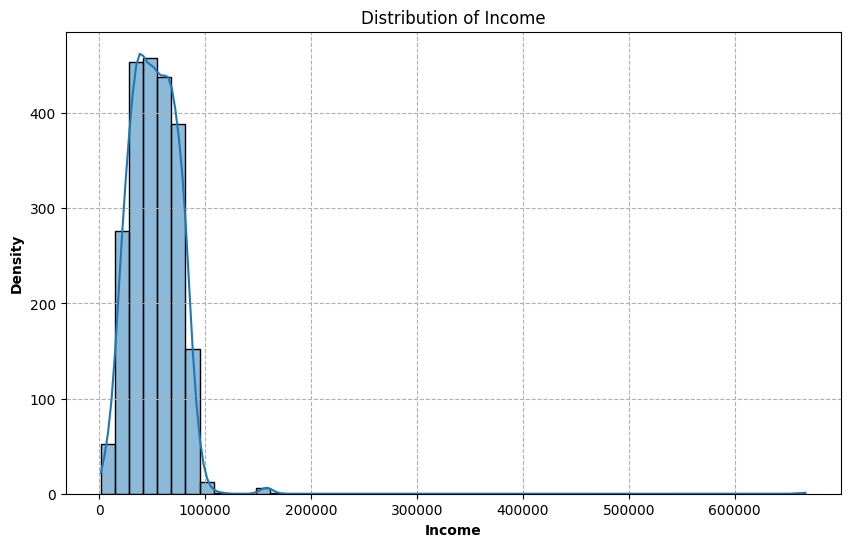

In [ ]:
# Plot the distribution of Income with outlier
plt.figure(figsize=(10,6))
sns.histplot(dataset['Income'], bins=50, kde=True)
plt.xlabel("Income", fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.grid(True, linestyle='--')
plt.title("Distribution of Income")

In [ ]:
# clip the outlier
dataset['Income'] = dataset['Income'].clip(lower=stats_df.iloc[11]['Outlier Lower Bound'], upper=stats_df.iloc[11]['Outlier Upper Bound'])

Text(0.5, 1.0, 'Distribution of Income')

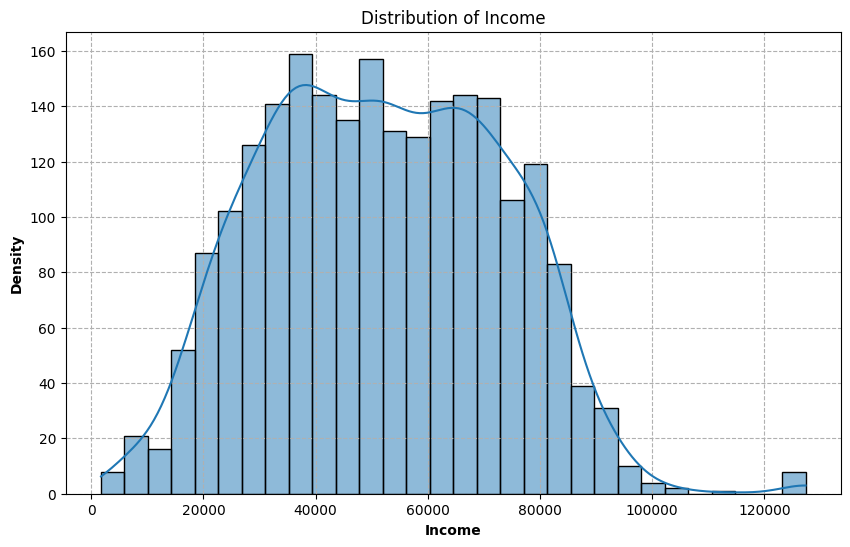

In [ ]:
# Plot the distribution of Income after clipping of  outlier
plt.figure(figsize=(10,6))
sns.histplot(dataset['Income'], bins=30, kde=True)
plt.xlabel("Income", fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.grid(True, linestyle='--')
plt.title("Distribution of Income")

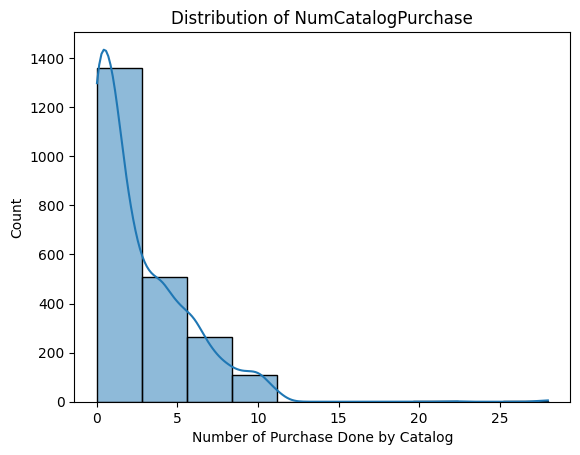

In [ ]:
# Plot Distribution of Number of Catlogs Purchase with Outlier
sns.histplot(dataset['NumCatalogPurchases'], bins=10, kde=True)
plt.xlabel("Number of Purchase Done by Catalog")
plt.title('Distribution of NumCatalogPurchase')
plt.show()

In [ ]:
dataset[dataset['NumCatalogPurchases'] > stats_df.iloc[8, 6]]['NumCatalogPurchases']

,NumCatalogPurchases
325,28
497,28
961,28
2204,22


We Could just Remove this values but a better way is to impute the clipping the outliers using Winsorization which involves capping the extreme values at a specified percentile.

In [ ]:
from scipy.stats import mstats

# Winsorize the data at the 5th and 95th percentiles
dataset['NumCatalogPurchases'] = mstats.winsorize(dataset['NumCatalogPurchases'], limits=[0.05, 0.05])

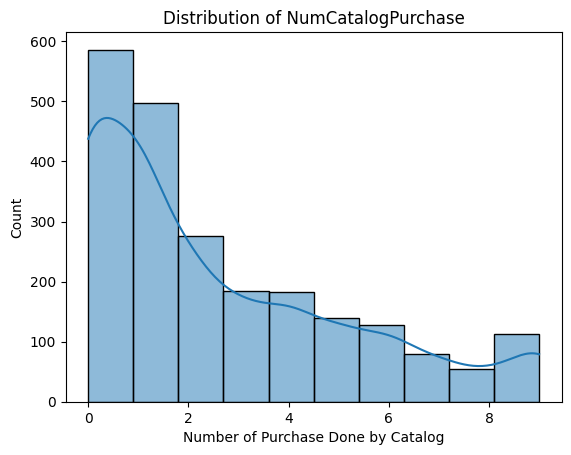

In [ ]:
# Plot Distribution of Number of Catlogs Purchase after Outlier Treatment
sns.histplot(dataset['NumCatalogPurchases'], bins=10, kde=True)
plt.xlabel("Number of Purchase Done by Catalog")
plt.title('Distribution of NumCatalogPurchase')
plt.show()

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



### **Continuous Column**

In [ ]:
from scipy import stats
# Define a function to calculate AIC for a given distribution
def calculate_aic(data, dtype: str):
    """
    Calculate the Akaike Information Criterion (AIC) for a given dataset
    across different distributions, and plot the histogram of the data
    along with the PDFs of the fitted distributions.

    Parameters:
    - data: array-like
        The dataset for which the AIC is to be calculated.
    - dtype: str
        The type of distributions to fit: 'Continuous'.

    Returns:
    - None
    """
    # Calculate AIC for each distribution
    aic_values = {}
    if dtype == 'Continues':

      dist = {
          'Uniform': stats.uniform,
          'Normal': stats.norm,
          'Exponential': stats.expon
      }

      for dist_name, dist_func in dist.items():
        params = dist_func.fit(data)
        log_likelihood = np.sum(dist_func.logpdf(data, *params))
        k = len(params)
        aic = 2*k - 2*log_likelihood
        aic_values[dist_name] = aic
    else:
      raise ValueError("Invalid Data type should be Continues")

    # Find the distribution with the minimum AIC value
    best_fit = min(aic_values, key=aic_values.get)
    best_params = dist[best_fit].fit(data)

    # Print the results
    print("AIC values for each distribution:")
    for dist_name, aic in aic_values.items():
        print(f"{dist_name}: {aic}")
    print(f"\nThe best fitting distribution is: {best_fit}")

    # Plot the histogram of the data and the PDFs of the fitted distributions
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=80, kde=False, stat='density', label='Data')

    x = np.linspace(data.min(), data.max(), 50)
    for dist_name, dist in dist.items():
          params = dist.fit(data)
          pdf = dist.pdf(x, *params)
          plt.plot(x, pdf, label=f'{dist_name} fit')

    plt.legend()
    plt.xlabel(data.name)
    plt.ylabel('Density')
    plt.title('Distribution Fit Comparison')
    plt.show()
    return best_fit, best_params

In [ ]:
print(Continuous_columns)

['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total Spends', 'Age']


#### **Income**

AIC values for each distribution:
Uniform: 52603.82139981283
Normal: 50957.83233405798
Exponential: 52971.93421929454

The best fitting distribution is: Normal


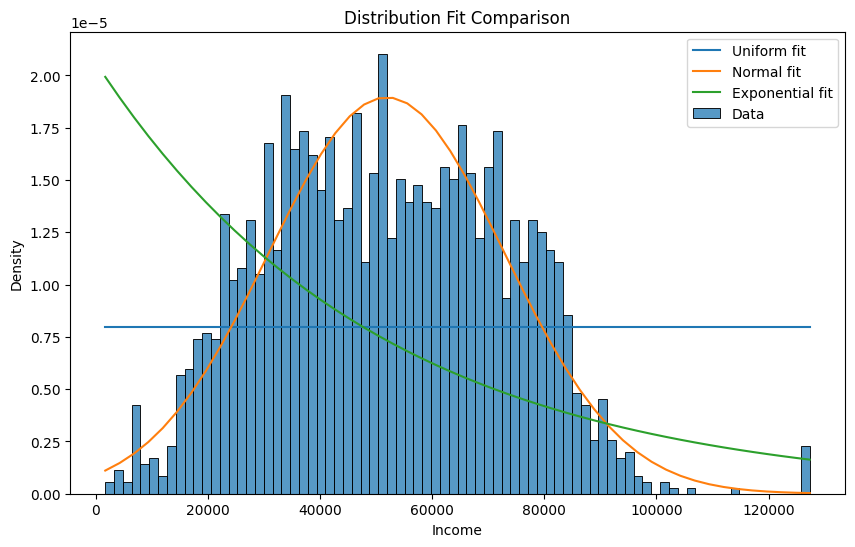

In [ ]:
# Function call to determine the best-fitting distribution and its parameters based on AIC for the given data
best_fit, best_params = calculate_aic(data=dataset['Income'], dtype='Continues')

In [ ]:
expected_value = stats.norm.mean(*best_params)
print(f"Expected value: {expected_value}")

Expected value: 51901.358875


Let See what is the Prob of Customer earning at least 60000

In [ ]:
# Calculate the probability
value = 60000
probability = 1 - stats.norm.cdf(value, *best_params)

print(f"Probability of earning more than 60,000: {np.round(probability*100, 2)} %")

Probability of earning more than 60,000: 35.02 %


#### **Age**

AIC values for each distribution:
Uniform: 20767.58586726877
Normal: 17486.274842543302
Exponential: 19281.456056048613

The best fitting distribution is: Normal


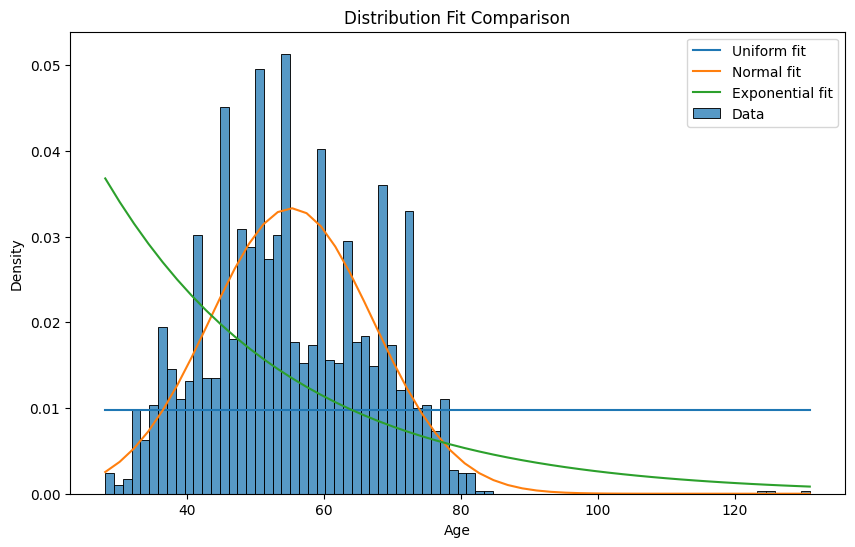

In [ ]:
# Function call to determine the best-fitting distribution and its parameters based on AIC for the given data
best_fit, best_params = calculate_aic(data=dataset['Age'], dtype='Continues')

In [ ]:
expected_value = stats.norm.mean(*best_params)
print(f"Expected value: {expected_value}")

Expected value: 55.19419642857143


Let See the Probability of Customer below age of 40.

In [ ]:
# Calculate the probability
value = 40
probability = stats.norm.cdf(value, *best_params)

print(f"Probability of being below 40 years old: {np.round(probability * 100, 2)} %")

Probability of being below 40 years old: 10.24 %


#### **Recency**

AIC values for each distribution:
Uniform: 20590.136928602962
Normal: 21439.525571857077
Exponential: 21929.34379140177

The best fitting distribution is: Uniform


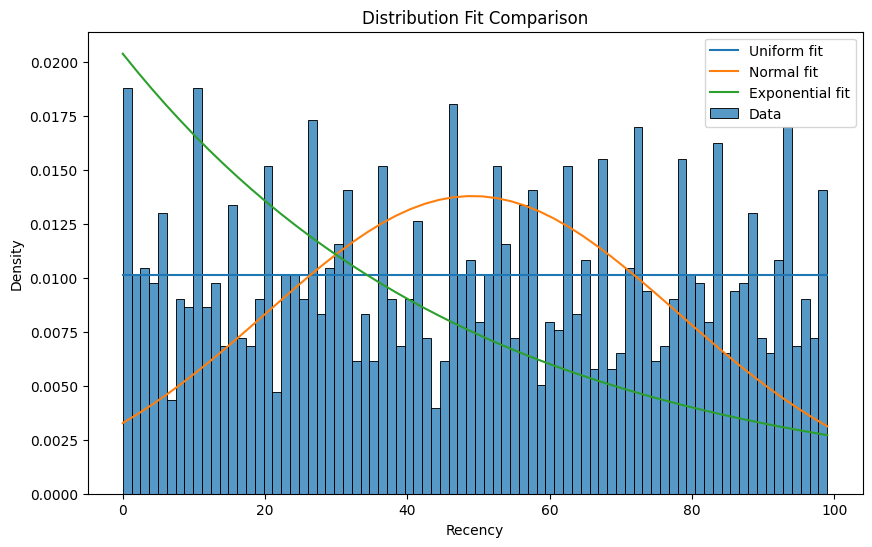

In [ ]:
# Function call to determine the best-fitting distribution and its parameters based on AIC for the given data
best_fit, best_params = calculate_aic(data=dataset['Recency'], dtype='Continues')

In [ ]:
expected_value = stats.uniform.mean(*best_params)
print(f"Expected value: {expected_value}")

Expected value: 49.5


Since the Distribution is Uniform the prob will be same for the entire data points

#### **Total Spends**

AIC values for each distribution:
Uniform: 35091.4235286645
Normal: 35034.85254304702
Exponential: 33148.200894416645

The best fitting distribution is: Exponential


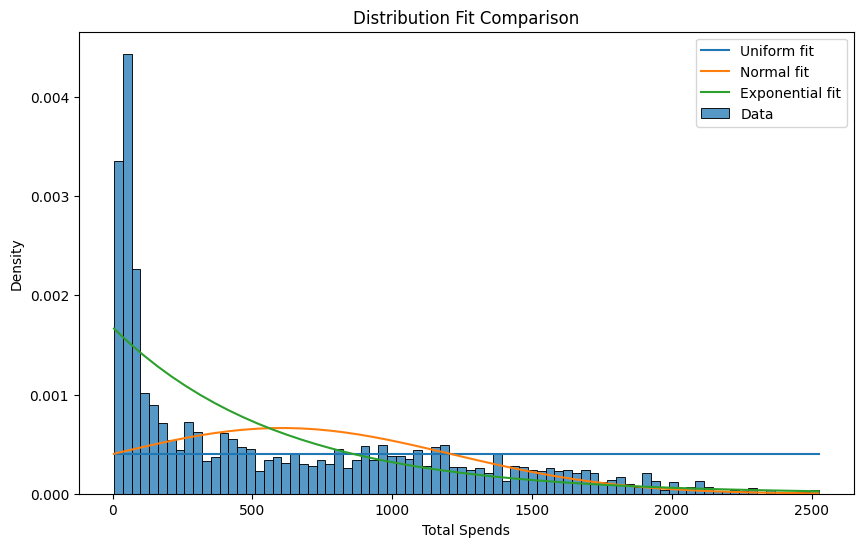

In [ ]:
# Function call to determine the best-fitting distribution and its parameters based on AIC for the given data
best_fit, best_params = calculate_aic(data=dataset['Total Spends'], dtype='Continues')

In [ ]:
expected_value = stats.expon.mean(*best_params)
print(f"Expected value: {expected_value}")

Expected value: 605.7982142857143


Probability of spending atleast 1000 overall

In [ ]:
value = 1000
probability_at_least_1000 = 1 - stats.expon.cdf(value, *best_params)

print(f"Probability of spending at least 1000: {np.round(probability_at_least_1000 * 100,2)} %")

Probability of spending at least 1000: 19.09 %


#### **MntGoldProds**

AIC values for each distribution:
Uniform: 26398.566068979457
Normal: 24075.818596064564
Exponential: 21439.396279210076

The best fitting distribution is: Exponential


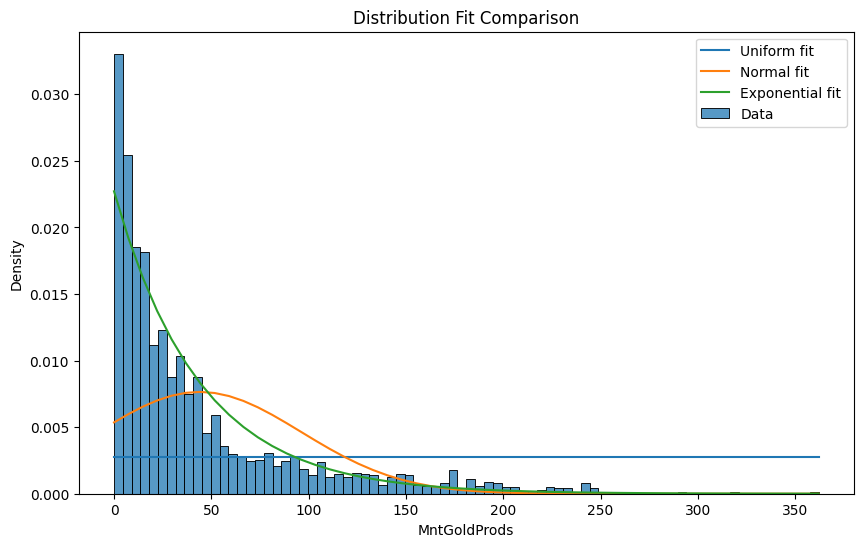

In [ ]:
# Function call to determine the best-fitting distribution and its parameters based on AIC for the given data
best_fit, best_params = calculate_aic(data=dataset['MntGoldProds'], dtype='Continues')

In [ ]:
expected_value = stats.expon.mean(*best_params)
print(f"Expected value: {expected_value}")

Expected value: 44.021875


Probability of spending atleast 50 on Gold

In [ ]:
value = 50
probability_at_least_50 = 1 - stats.expon.cdf(value, *best_params)

print(f"Probability of spending at least 50: {np.round(probability_at_least_50 * 100,2)} %")

Probability of spending at least 50: 32.12 %


#### **MntWines**

AIC values for each distribution:
Uniform: 32746.271732975576
Normal: 32428.46056432028
Exponential: 30095.336633696512

The best fitting distribution is: Exponential


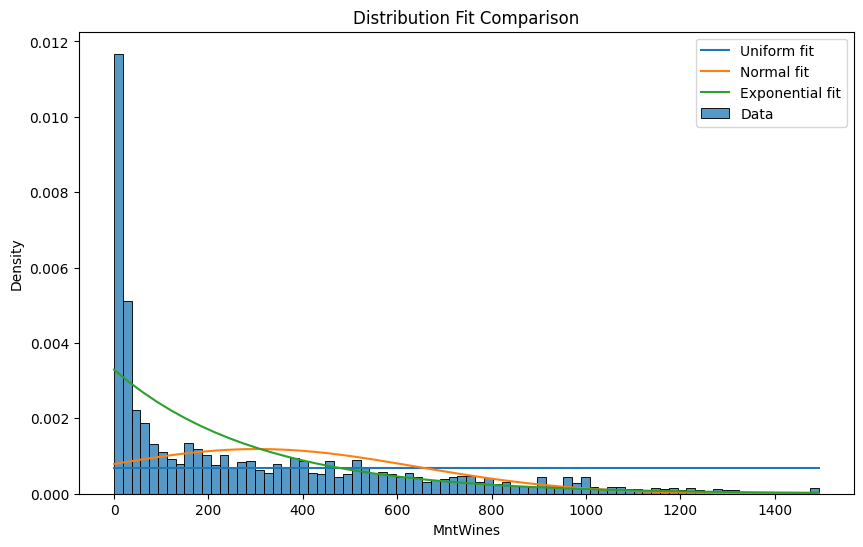

In [ ]:
# Function call to determine the best-fitting distribution and its parameters based on AIC for the given data
best_fit, best_params = calculate_aic(data=dataset['MntWines'], dtype='Continues')

In [ ]:
expected_value = stats.expon.mean(*best_params)
print(f"Expected value: {expected_value}")

Expected value: 303.9357142857143


Probability of spending atleast 200 on Wines

In [ ]:
value = 200
probability_at_least_200 = 1 - stats.expon.cdf(value, *best_params)

print(f"Probability of spending at least 200: {np.round(probability_at_least_200 * 100, 2)} %")

Probability of spending at least 200: 51.79 %


#### **MntFruits**

AIC values for each distribution:
Uniform: 23718.00561476573
Normal: 22860.576803848395
Exponential: 19132.049059545425

The best fitting distribution is: Exponential


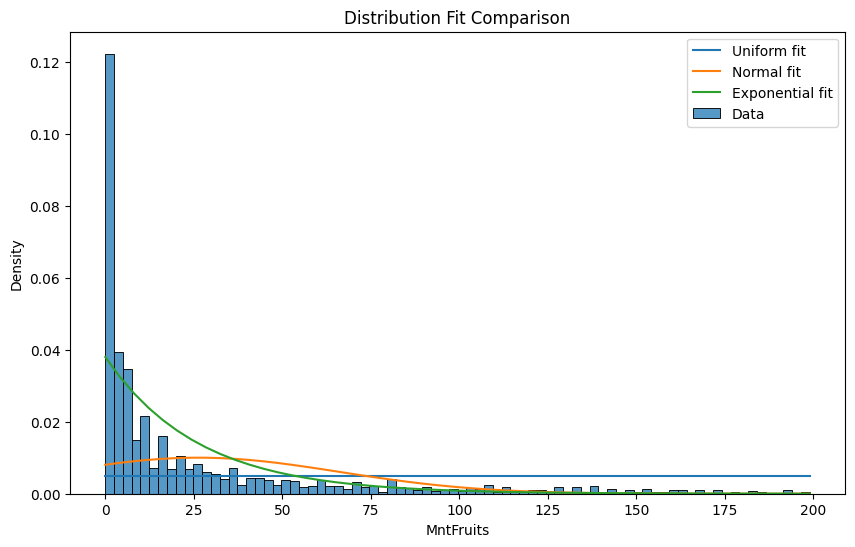

In [ ]:
# Function call to determine the best-fitting distribution and its parameters based on AIC for the given data
best_fit, best_params = calculate_aic(data=dataset['MntFruits'], dtype='Continues')

In [ ]:
expected_value = stats.expon.mean(*best_params)
print(f"Expected value: {expected_value}")

Expected value: 26.302232142857143


Probability of spending atleast 25 on Fruits

In [ ]:
value = 25
probability_at_least_25 = 1 - stats.expon.cdf(value, *best_params)

print(f"Probability of spending at least 25: {np.round(probability_at_least_25 * 100, 2)} %")

Probability of spending at least 25: 38.66 %


#### **MntSweetProducts**

AIC values for each distribution:
Uniform: 24967.250064156386
Normal: 23027.19248746309
Exponential: 19259.78144820969

The best fitting distribution is: Exponential


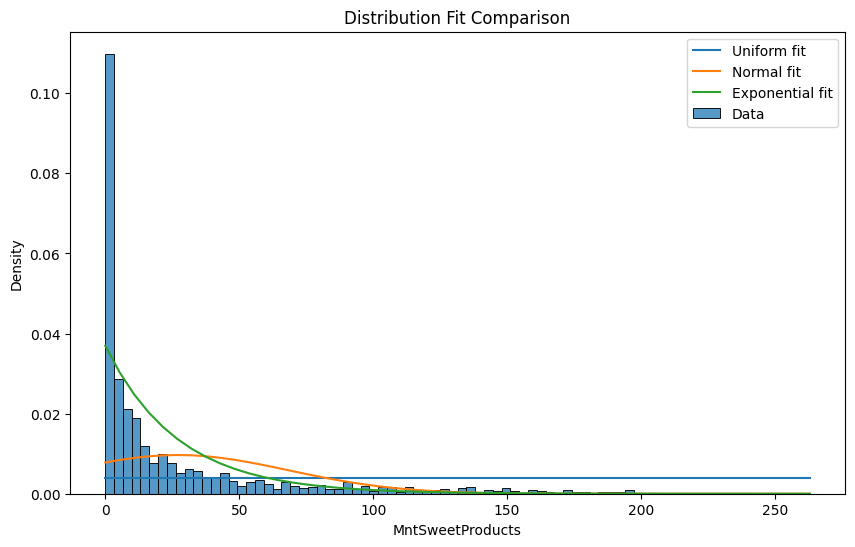

In [ ]:
# Function call to determine the best-fitting distribution and its parameters based on AIC for the given data
best_fit, best_params = calculate_aic(data=dataset['MntSweetProducts'], dtype='Continues')

In [ ]:
expected_value = stats.expon.mean(*best_params)
print(f"Expected value: {expected_value}")

Expected value: 27.06294642857143


Probability of spending most 50 on sweet products

In [ ]:
value = 50
probability_at_most_50 = stats.expon.cdf(value, *best_params)

print(f"Probability of spending at most 50: {np.round(probability_at_most_50 * 100, 2)} %")

Probability of spending at most 50: 84.24 %


#### **MntMeatProducts**

AIC values for each distribution:
Uniform: 33393.36083600525
Normal: 30638.195473096792
Exponential: 27411.270761425694

The best fitting distribution is: Exponential


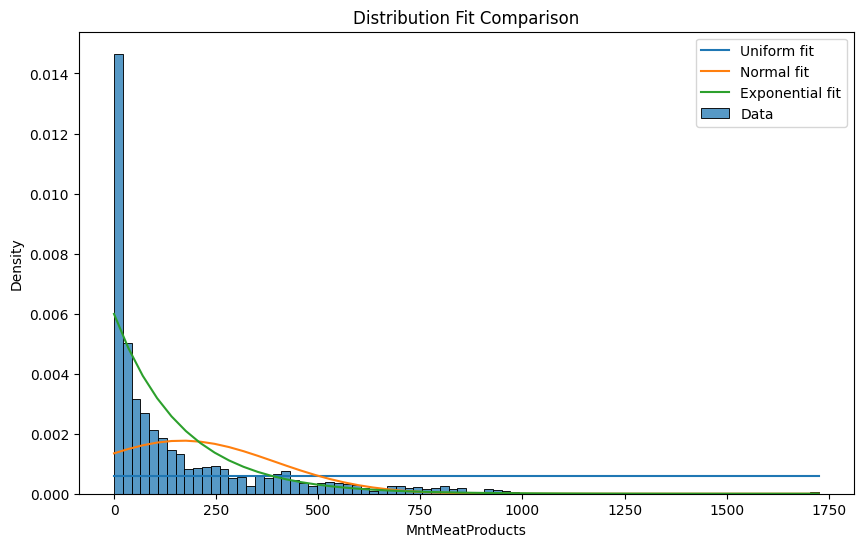

In [ ]:
# Function call to determine the best-fitting distribution and its parameters based on AIC for the given data
best_fit, best_params = calculate_aic(data=dataset['MntMeatProducts'], dtype='Continues')

In [ ]:
expected_value = stats.expon.mean(*best_params)
print(f"Expected value: {expected_value}")

Expected value: 166.95


Probability of spending at least 200 on Meat products

In [ ]:
value = 200
probability_at_least_200 = 1 - stats.expon.cdf(value, *best_params)

print(f"Probability of spending at least 200: {np.round(probability_at_least_200 * 100, 2)} %")

Probability of spending at least 200: 30.18 %


### **Discrete Column**

In [ ]:
print(Discrete_columns)

['Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain']


#### **Complain**

   Complain  count  Probability
0         0   2219     0.990625
1         1     21     0.009375


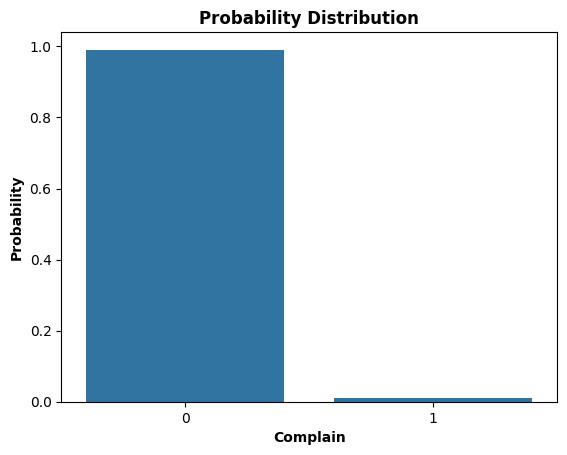

In [ ]:
# Convert to a DataFrame for easier manipulation
df = dataset['Complain'].value_counts().reset_index()

# Calculate total number of observations
total_count = sum(df['count'])

# Calculate probabilities
df['Probability'] = df['count'] / total_count

# Print df
print(df)

# Plot using Seaborn
sns.barplot(x='Complain', y='Probability', data=df)
plt.xlabel('Complain', fontweight='bold')
plt.ylabel('Probability', fontweight='bold')
plt.title('Probability Distribution', fontweight='bold')
plt.show()

The Expected Value is: 21.0


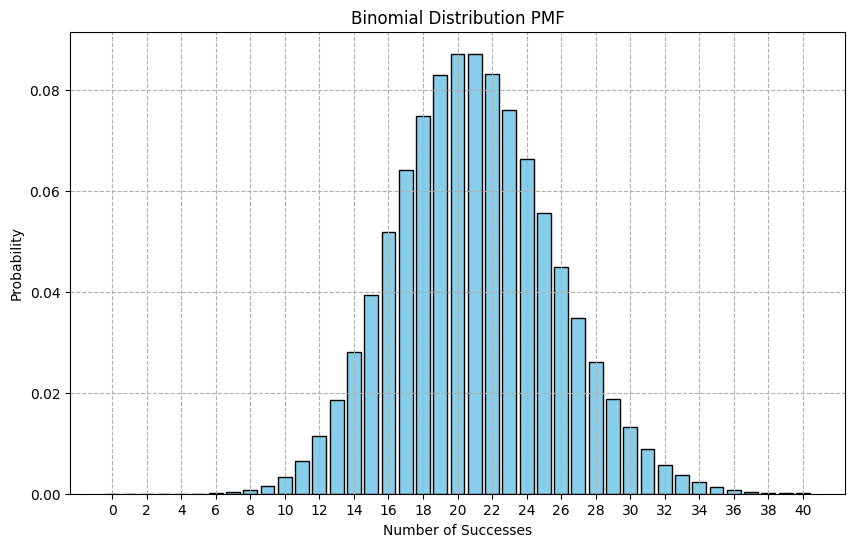

In [ ]:
n = df['count'].sum() # Number of trails
p = 0.009375 # Probability of success (Prob of Complaint)
print(f'The Expected Value is: {n*p}')
# Define the range of possible number of successes
x = np.arange(0, 41)  # You can adjust the range as needed

# Calculate the PMF for each number of successes
pmf = stats.binom.pmf(x, n, p)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution PMF')
plt.xticks(np.arange(0, 41, 2))  # Show all x-ticks
plt.grid(True, linestyle='--')

# Show the plot
plt.show()


What is the probability of observing exactly 20 complaints out of 2000 trials, given that the probability of a single complaint is p?

The expected value is: 18.75
Probability of observing 20 successes is 8.57 %


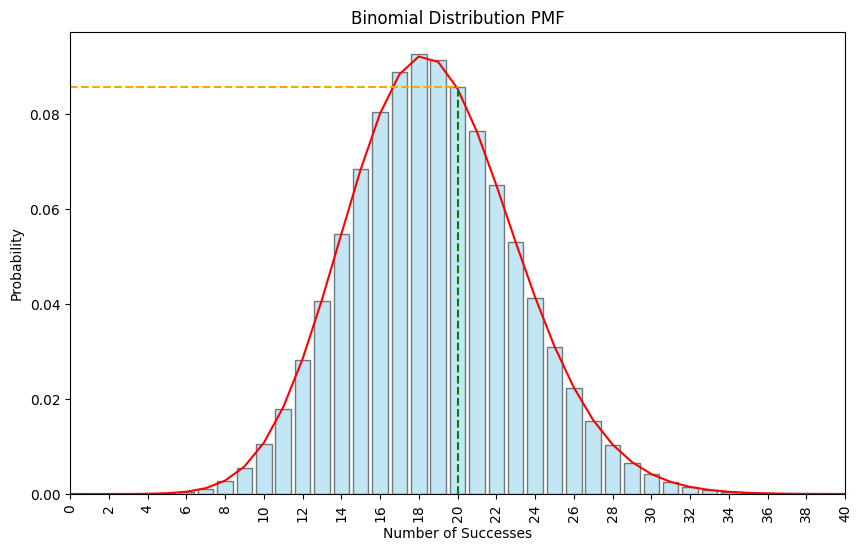

In [ ]:
from scipy.ndimage import gaussian_filter1d
# Calculate expected value
n = 2000 # Number of trails
p = 0.009375 # Probability of success (Prob of Complaint)
k = 20 # Number of successes
expected_value = n*p
prob = stats.binom.pmf(k, n, p)
print(f"The expected value is: {expected_value}")
print(f"Probability of observing 20 successes is {np.round(prob*100, 2)} %")

# Define the range of possible number of successes
x = np.arange(0, 41)

# Calculate the PMF for each number of successes
pmf = stats.binom.pmf(x, n, p)

# Apply Gaussian filter to smooth the PMF
smoothed_pmf = gaussian_filter1d(pmf, sigma=0.5)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black', alpha=0.5)
plt.plot(x, smoothed_pmf, color='red')
plt.plot([20,20], [0, prob], color='green', linestyle='--', label='x = 20')
plt.plot([0,20], [prob, prob], color='orange', linestyle='--', label='x = 20')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution PMF')
plt.xticks(np.arange(0, 41, 2), rotation=90)  # Show all x-ticks
plt.xlim(0, 40)
# Show the plot
plt.show()

#### **Response**

   Response  count  Probability
0         0   1906     0.850893
1         1    334     0.149107


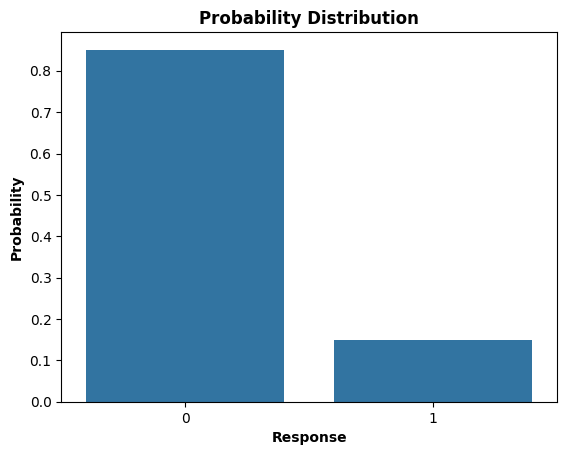

In [ ]:
# Convert to a DataFrame for easier manipulation
df = dataset['Response'].value_counts().reset_index()

# Calculate total number of observations
total_count = sum(df['count'])

# Calculate probabilities
df['Probability'] = df['count'] / total_count

# Print df
print(df)

# Plot using Seaborn
sns.barplot(x='Response', y='Probability', data=df)
plt.xlabel('Response', fontweight='bold')
plt.ylabel('Probability', fontweight='bold')
plt.title('Probability Distribution', fontweight='bold')
plt.show()

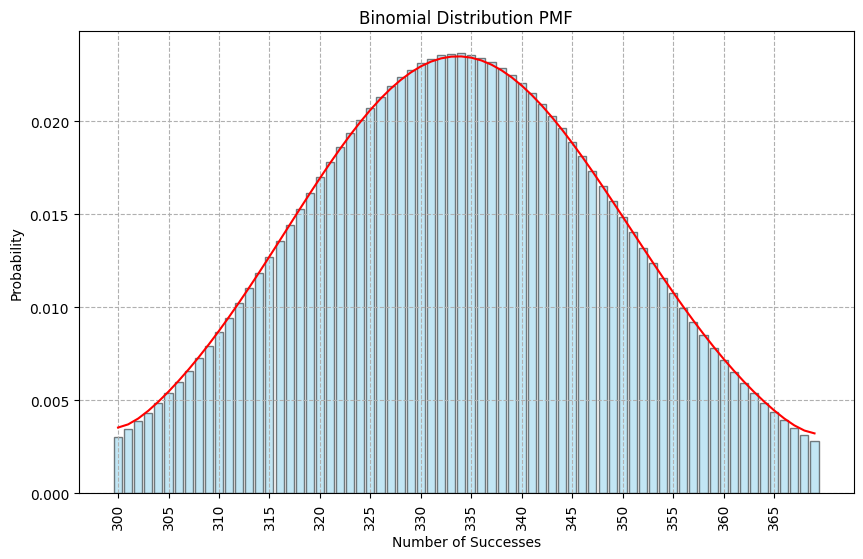

In [ ]:
from scipy.ndimage import gaussian_filter1d
n = df['count'].sum() # Number of trails
p = 0.149107 # Probability of success (Prob of Response)
# Define the range of possible number of successes
x = np.arange(300, 370)  # You can adjust the range as needed

# Calculate the PMF for each number of successes
pmf = stats.binom.pmf(x, n, p)

# Apply Gaussian filter to smooth the PMF
smoothed_pmf = gaussian_filter1d(pmf, sigma=2)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black', alpha=0.5)
plt.plot(x, smoothed_pmf, color='red')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution PMF')
plt.xticks(np.arange(300, 370, 5), rotation=90)  # Show all x-ticks
plt.grid(True, linestyle='--')

# Show the plot
plt.show()

What is the probability of observing atlest 20 Reposne out of 200 trials, given that the probability of a single complaint is p?

The probability of observing at least 20 responses out of 200 trials is: 98.38 %


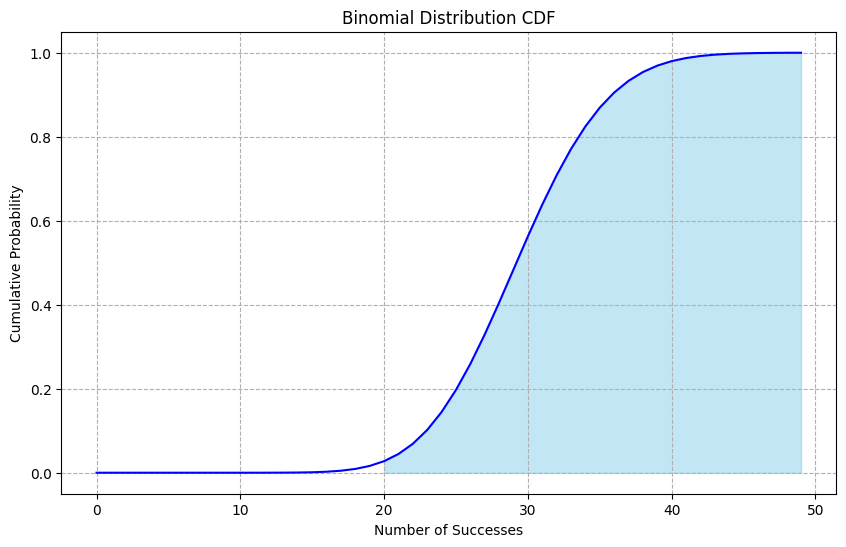

In [ ]:
n = 200  # Number of trials
p = 0.149107  # Probability of a single response
k = 20
# Calculate the CDF for 19 responses
cdf_19 = stats.binom.cdf(k-1, n, p)

# The probability of at least 20 responses
prob_at_least_20 = 1 - cdf_19

print(f'The probability of observing at least 20 responses out of 200 trials is: {np.round(prob_at_least_20*100,2)} %')
# Define a more manageable range of possible number of successes around the expected value
x = np.arange(0, 50)  # Adjust this range as needed

# Calculate the CDF for each number of successes in the defined range
cdf = stats.binom.cdf(x, n, p)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, cdf, color='blue')
# Shade the area for at least 20 responses
x_fill = np.arange(20, 50)  # Range to fill
cdf_fill = stats.binom.cdf(x_fill, n, p)
plt.fill_between(x_fill, cdf_fill, color='skyblue', alpha=0.5, label='At least 20 Responses')
plt.xlabel('Number of Successes')
plt.ylabel('Cumulative Probability')
plt.title('Binomial Distribution CDF')
plt.grid(True, linestyle='--')

# Show the plot
plt.show()

**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

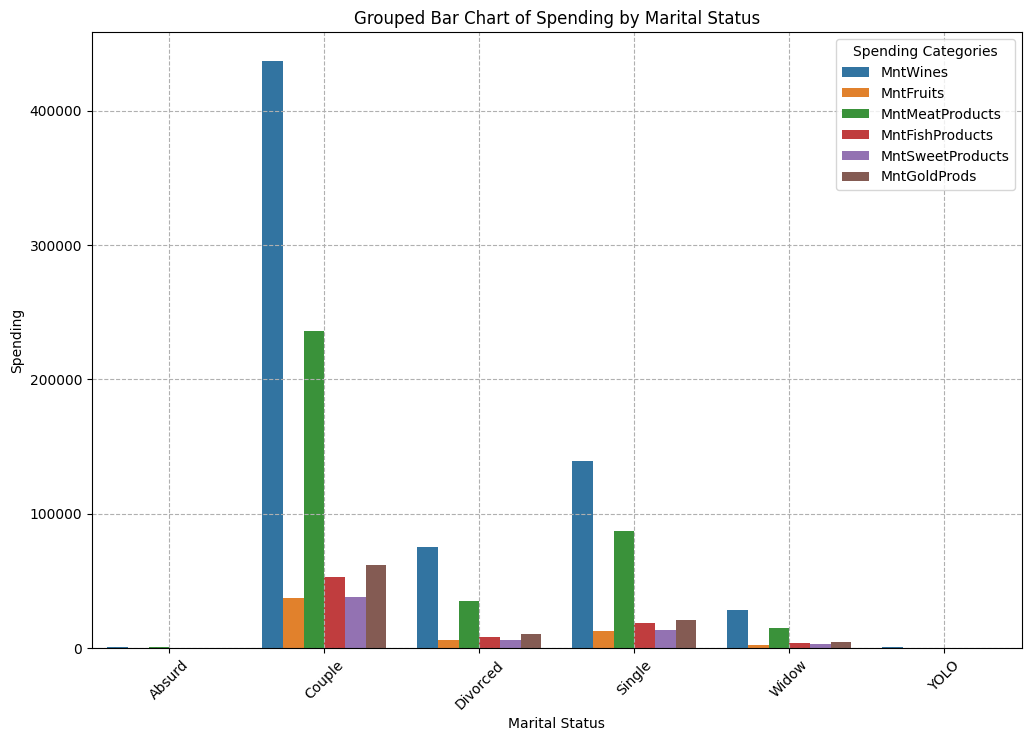

In [ ]:
marital_status_spends = dataset.groupby('Marital_Status')[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum().reset_index()
df_long = marital_status_spends.melt(id_vars='Marital_Status',
                  var_name='Category',
                  value_name='Spending')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Marital_Status', y='Spending', hue='Category', data=df_long)

plt.title('Grouped Bar Chart of Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Spending')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--')
plt.legend(title='Spending Categories')
plt.show()

Couples exhibit the highest spending across all categories, with particularly high amounts in wine, meat products, and gold. Single individuals also show significant spending, especially in wine and meat products, but generally spend less than couples. Divorced individuals have high spending, particularly on meat products, though still lower than couples in most categories. The "Widow" and "YOLO" categories have the lowest spending across all categories. This consolidation highlights that marital status as a "Couple" is associated with the highest spending, followed by single and divorced individuals.

Correlation: 0.7996885577341887
Covariance : 10140486.660496423


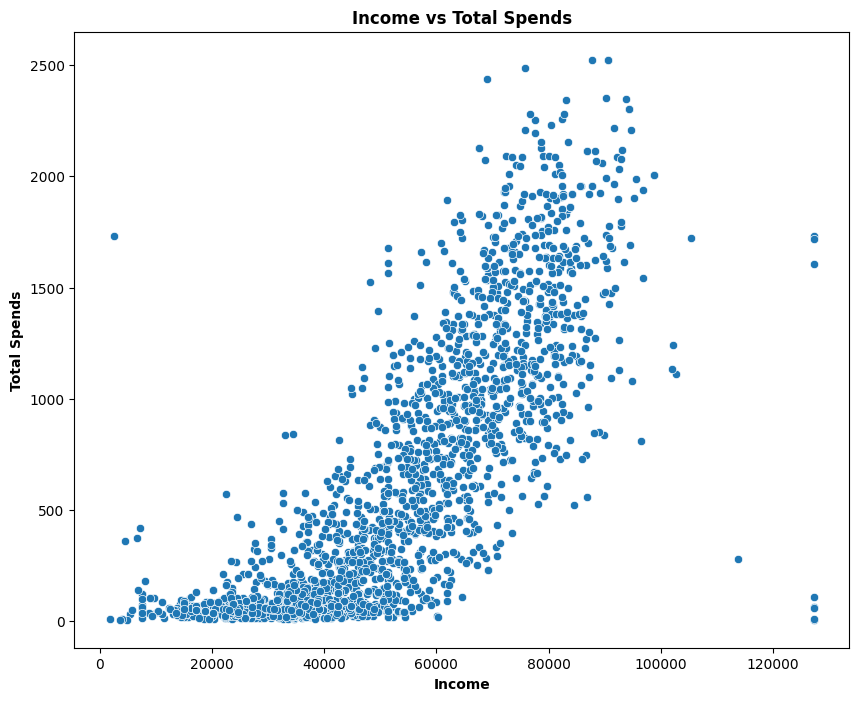

In [ ]:
# Calculate Cov and Corr
corr = dataset['Income'].corr(dataset['Total Spends'])
print(f"Correlation: {corr}")
cov = dataset['Income'].cov(dataset['Total Spends'])
print(f"Covariance : {cov}")
# Plotting Scatter plot to show the Relationship Between Income and Total Spends
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dataset, x='Income', y='Total Spends')
plt.xlabel("Income", fontweight='bold')
plt.ylabel("Total Spends", fontweight='bold')
plt.title("Income vs Total Spends", fontweight='bold')
plt.show()

The scatterplot shows a strong positive correlation (0.80) between income and total spending, suggesting that higher income is strongly associated with increased spending. The covariance of 10,140,486.66 further supports this relationship, indicating a significant positive relationship between these variables.

In [ ]:
# Define the age categories
def categorize_age(age):
    if age < 35:
        return 'Young (<35)'
    elif 35 <= age < 55:
        return 'Middle Age (35-54)'
    else:
        return 'Old (>=55)'

# Apply the function to create a new column
dataset['Age Category'] = dataset['Age'].apply(categorize_age)

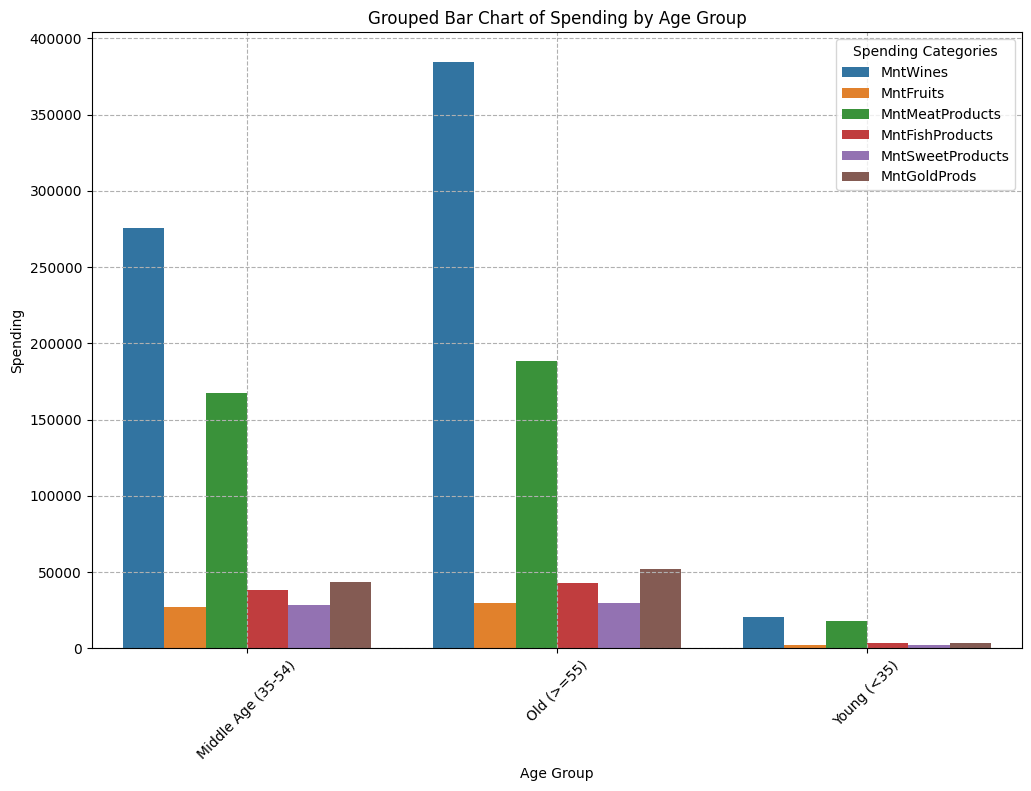

In [ ]:
age_spend = dataset.groupby('Age Category')[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum().reset_index()
df_long = age_spend.melt(id_vars='Age Category',
                  var_name='Category',
                  value_name='Spending')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Age Category', y='Spending', hue='Category', data=df_long)

plt.title('Grouped Bar Chart of Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--')
plt.legend(title='Spending Categories')
plt.show()

The data reveals that older customers tend to spend significantly more on wine, meat products, and gold compared to middle-aged and young customers. For instance, while older customers spend 384,814 on wines, young customers spend only 20,319. This trend is consistent across other categories, with older customers consistently outspending their younger counterparts. Conversely, young customers exhibit relatively lower spending across all categories.

In [ ]:
# Relationship of Eductationa and Total Spends
np.random.seed(101)
spend_by_eductaion = dataset.groupby(['Education'])['Total Spends'].sum().reset_index().sample(frac=1)
spend_by_eductaion['Percentage'] = np.round((spend_by_eductaion['Total Spends'] * 100)/spend_by_eductaion['Total Spends'].sum(), 2)
spend_by_eductaion

,Education,Total Spends,Percentage
0,2n Cycle,100795,7.43
4,PhD,326791,24.08
2,Graduation,698626,51.48
1,Basic,4417,0.33
3,Master,226359,16.68


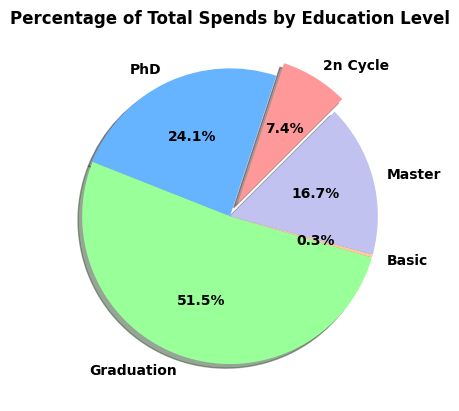

In [ ]:
# Define a color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.pie(spend_by_eductaion['Percentage'],
        labels=spend_by_eductaion['Education'],
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        explode=(0.1,0,0,0,0),
        colors=colors,
        textprops={'fontweight':'bold'})

plt.title('Percentage of Total Spends by Education Level', fontweight='bold')
plt.show()

The data reveals that higher education levels are strongly associated with increased total spending. Specifically, customers with a PhD and those with Graduation spend significantly more, accounting for 24.08% and 51.48% of the total spending, respectively. In contrast, those with Basic education spend substantially less, contributing only 0.33% to the total spending. This suggests that education level is a key factor influencing spending behavior, with more educated customers tending to spend more.

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

### **Insights**

In [ ]:
age_deals = dataset.groupby('Age Category')['NumDealsPurchases'].sum().sort_values().reset_index()
age_deals

,Age Category,NumDealsPurchases
0,Young (<35),92
1,Middle Age (35-54),2516
2,Old (>=55),2600


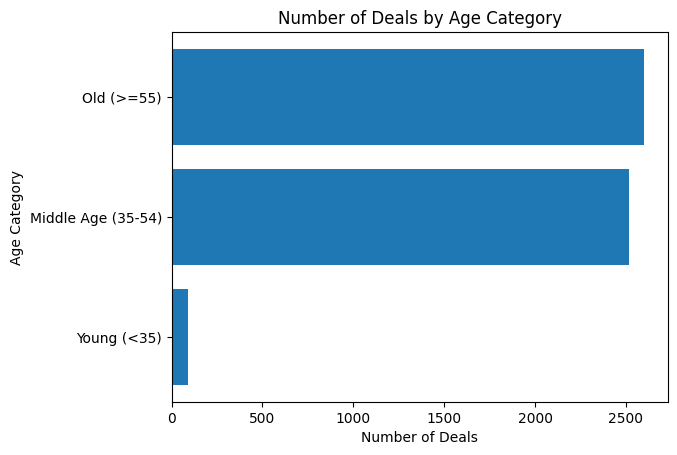

In [ ]:
plt.barh(age_deals['Age Category'], age_deals['NumDealsPurchases'])
plt.ylabel('Age Category')
plt.xlabel('Number of Deals')
plt.title('Number of Deals by Age Category')
plt.show()


**Insights:**

Young customers make significantly fewer purchases with discounts compared to Middle Age and Old customers.

Middle Age and Old customers show higher engagement with discount deals.

**Recommendations:**

***Target Young Customers:*** Develop promotional campaigns to encourage more discount purchases among younger customers.

***Loyalty Programs:*** Enhance loyalty programs for Middle Age and Old customers to retain and further incentivize their discount purchases.

***Personalized Offers:*** Use targeted discounts and personalized offers based on age segments to increase overall purchase frequency and engagement.

In [ ]:
np.random.seed(42)
marital_status_wines = dataset.groupby('Marital_Status')['MntWines'].sum().reset_index().sample(frac=1)
marital_status_wines

,Marital_Status,MntWines
0,Absurd,711
1,Couple,436710
5,YOLO,644
2,Divorced,75364
4,Widow,28434
3,Single,138953


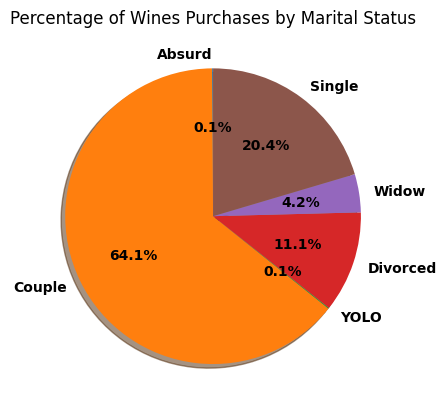

In [ ]:
# Plotting the pie plot
plt.pie(marital_status_wines['MntWines'], labels=marital_status_wines['Marital_Status'], autopct='%1.1f%%', startangle=90, shadow=True,textprops={'fontweight':'bold'})
plt.title('Percentage of Wines Purchases by Marital Status')
plt.show()

**Insight:**

Based on the analysis of spending on wines (MntWines) across different marital statuses:

Couples spend the most on wines, totaling 436,710, which is approximately 64% of the total wine spending.

Singles also spend significantly, with 138,953, making up about 20% of the total.

Divorced individuals spend 75,364, around 11%.

Widows and YOLO spend the least, contributing about 4% and 1% respectively.

**Recommendations:**

***Target Couples:*** Focus marketing efforts on couples, as they represent the largest segment of wine spenders. Consider creating special promotions or discounts for them.

***Engage Singles:*** Develop targeted campaigns for singles, who also contribute a significant portion of sales.

***Explore Divorced Segment:*** Although smaller, there is potential in the divorced segment. Tailor offerings to their preferences.

***Minimal Focus on Others:*** Since widows and YOLO spend less, allocate fewer resources to these groups unless specific opportunities arise.

In [ ]:
web_spend_by_ed = dataset.groupby('Education')[['NumWebPurchases','NumWebVisitsMonth']].mean().reset_index()
web_spend_by_ed['Conversion_rate'] = np.round(web_spend_by_ed['NumWebPurchases'] * 100 / web_spend_by_ed['NumWebVisitsMonth'], 2)
web_spend_by_ed

,Education,NumWebPurchases,NumWebVisitsMonth,Conversion_rate
0,2n Cycle,3.729064,5.453202,68.38
1,Basic,1.888889,6.870370,27.49
2,Graduation,4.125111,5.287489,78.02
3,Master,4.032432,5.178378,77.87
4,PhD,4.423868,5.259259,84.12


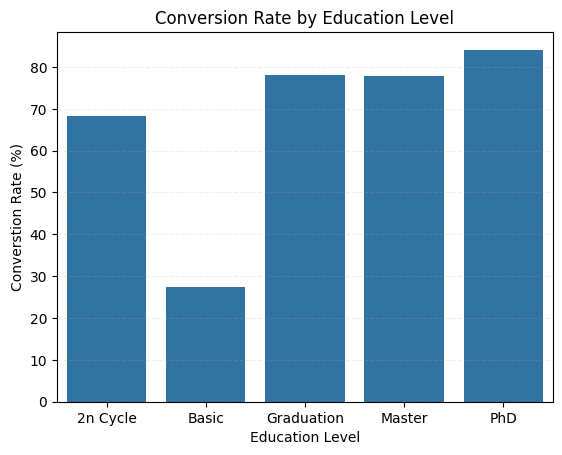

In [ ]:
sns.barplot(data=web_spend_by_ed, x='Education', y='Conversion_rate')
plt.xlabel('Education Level')
plt.ylabel('Converstion Rate (%)')
plt.title("Conversion Rate by Education Level")
plt.grid(axis='y', linestyle='--', alpha= 0.2)
plt.show()

**Insights:**

***Education Level Impact:*** Customers with higher education levels (Graduation, Master, PhD) have higher conversion rates (78.02%, 77.87%, 84.12%) compared to those with lower education levels (2nd Cycle, Basic).

***Website Engagement:*** Customers with lower education levels (Basic) have more website visits but fewer purchases, indicating a lower conversion rate.

**Recommendations:**

***Targeted Marketing:*** Focus marketing efforts on customers with higher education levels, as they have higher conversion rates.

***Engagement Strategies:*** Implement strategies to convert visits to purchases for customers with lower education levels, such as personalized offers or easier navigation.

***Educational Content:*** Provide educational content or resources to help less educated customers make informed purchasing decisions.

In [ ]:
marital_purchase_pattern = dataset.groupby('Marital_Status')[['NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].mean().reset_index()

marital_purchase_pattern

,Marital_Status,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,Absurd,3.500000,7.000000,6.500000
1,Couple,4.085180,2.563712,5.804709
2,Divorced,4.310345,2.629310,5.818966
3,Single,3.879917,2.544513,5.629400
4,Widow,4.623377,3.246753,6.415584
5,YOLO,7.000000,1.000000,6.000000


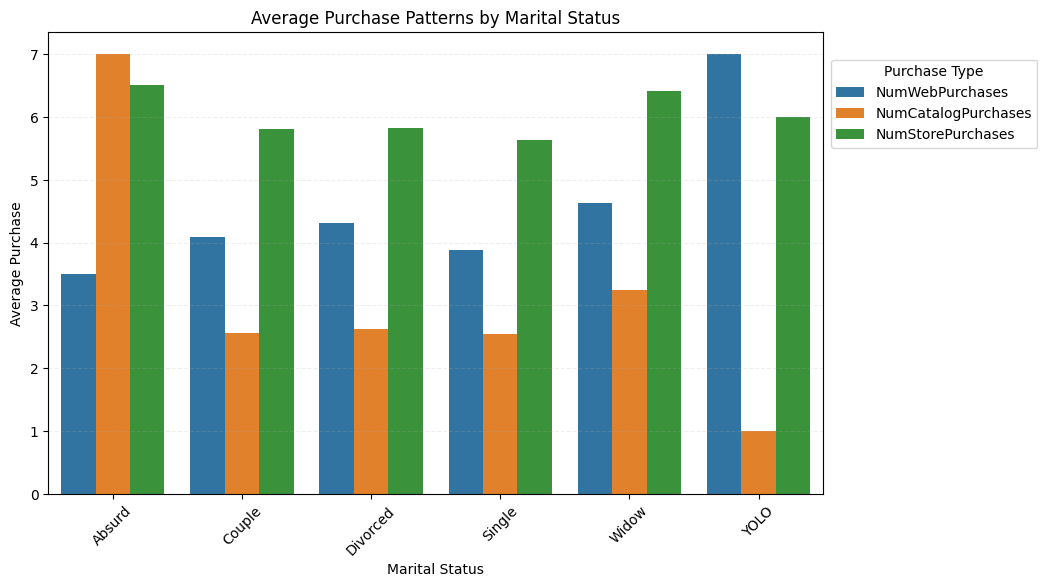

In [ ]:
df_long = marital_purchase_pattern.melt(id_vars='Marital_Status', var_name="Purchase Type", value_name= 'Average Purchase')

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=df_long, x='Marital_Status', y='Average Purchase', hue='Purchase Type')
plt.title('Average Purchase Patterns by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Purchase')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.legend(title='Purchase Type', loc=(1.01, 0.75))
plt.show()

**Insights:**

***Couples and Widows:*** These groups have high average store purchases, with Couples at 5.80 and Widows at 6.42.

***Absurd and YOLO:*** These groups exhibit the highest web purchases, with YOLO leading at 7.00.

***Widows:*** This group shows the highest catalog purchases at 3.25.

***Divorced and Single:*** Both groups have moderate web and store purchases but lower catalog purchases compared to Widows.

**Recommendations:**

***Focus on Store Experience for Couples and Widows:*** Enhance in-store promotions and loyalty programs to capitalize on their high store purchases.

***Expand Catalog Offerings for Widows:*** Increase catalog marketing efforts and offer exclusive catalog deals to maximize their engagement.

***Balanced Strategy for Divorced and Single:*** Implement a mix of online and in-store promotions to cater to their moderate purchase behaviors across different channels.

In [ ]:
age_group_purchase_pattern = dataset.groupby('Age Category')[['NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].mean().reset_index()

age_group_purchase_pattern

,Age Category,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,Middle Age (35-54),3.708976,2.167724,5.354488
1,Old (>=55),4.498141,2.976766,6.238848
2,Young (<35),3.590164,3.491803,5.754098


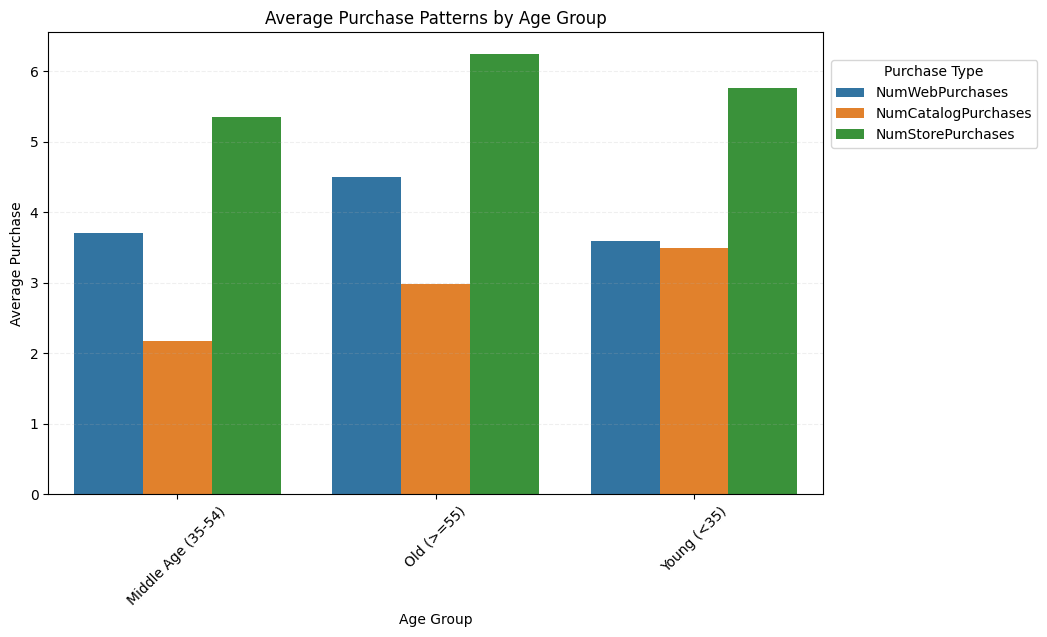

In [ ]:
df_long = age_group_purchase_pattern.melt(id_vars='Age Category', var_name="Purchase Type", value_name= 'Average Purchase')

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=df_long, x='Age Category', y='Average Purchase', hue='Purchase Type')
plt.title('Average Purchase Patterns by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.legend(title='Purchase Type', loc=(1.01, 0.75))
plt.show()

**Insights:**

***Middle Age (35 - 54):*** 37.09% store purchases, 22.39% web purchases, 13.16% catalog purchases.

***Old (>=55):*** 44.92% store purchases, 32.43% web purchases, 19.85% catalog purchases.

***Young:(<35)*** 39.34% store purchases, 24.53% web purchases, 15.52% catalog purchases.

**Recommendations:**

***Targeted Marketing for the Elderly:*** Increase web and catalog marketing efforts towards older customers, who show a higher percentage of purchases through these channels.

***Enhance Online Experience for Middle Age:*** Improve the website interface and online promotions to boost web purchases among middle-aged customers.

***Youth Engagement:*** Develop campaigns focusing on in-store experiences and promotions to attract more young customers to physical stores.

### **Conclusion and Recommendations:**

**Conclusion:**

Marital status, age, education level, and income are significant determinants of spending behavior. Couples and individuals with higher education levels and incomes exhibit the highest spending, particularly on wine, meat products, and gold. Older customers tend to spend more compared to younger ones, while discount engagement varies significantly across age groups.

**Recommendations:**

* **Targeted Promotions:** Focus marketing efforts on couples and singles, especially for wine products.
Develop campaigns to encourage discount purchases among younger customers.

* **Loyalty Programs:**
Enhance loyalty programs for middle-aged and older customers to retain and incentivize their purchases.

* **Personalized Offers:**
Use targeted discounts and personalized offers based on age segments to increase overall purchase frequency and engagement.

* **Educational Content:**
Provide educational content to help less educated customers make informed purchasing decisions.

* **Channel-Specific Strategies:**
Enhance in-store promotions for couples and widows.
Increase catalog marketing efforts for widows.
Implement a balanced mix of online and in-store promotions for divorced and single individuals.

* **Age-Specific Campaigns:**
Increase web and catalog marketing efforts towards older customers.
Improve the website interface and online promotions to boost web purchases among middle-aged customers.
Develop campaigns focusing on in-store experiences and promotions to attract more young customers to physical stores.

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍

**Vedio Explanation Link:**
[GeoGebra Experiment Explanation]( https://drive.google.com/file/d/1hqfIqWnBcVLqQl1VL4gR-grpvx2n50vy/view?usp=drive_link)